In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.0,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    #restaurant_capacity_mean = 50,
    #restaurant_capacity_stdev =20,
    blob_infection_rate = 0.1,
    exogenous_infection_rate = 0,
    num_communities = 20,
    num_blobs_to_infect = 1,
    hoprank_infected_sample_ratio = 1.0,
    num_samples_hoprank = 10
)
compute_hoprank = True
sc = 10
num_runs = 1
population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-a10-noInf"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[2324]
log initialized
Average similarity between family members is 0.9914638156213578 at temperature -1
Average similarity between family and home is 0.9998962089854201 at temperature -1
Average similarity between students and their classroom is 0.6514437356639936 at temperature -1
Average classroom occupancy is 13.26086956521739 and number classrooms is 23
Average similarity between workers is 0.9997886506176223 at temperature -1
Average office occupancy is 9.90625 and number offices is 64
Average friend similarity for adults: 0.9997866020440731 for kids: 0.8337584618757642
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0

avg restaurant similarity 0.463743542847032
clumpiness 0.9358457608669116
maxlen 36
giant component 0.8917418459403192
disconnects 0.18
avg restaurant similarity 0.6062157133989898
clumpiness 0.9338507998369148
maxlen 38
giant component 0.8917418459403192
disconnects 0.16
avg restaurant similarity 0.5644693325544948
clumpiness 0.9310724765171113
maxlen 42
giant component 0.8945176960444136
disconnects 0.13
avg restaurant similarity 0.4467309369992005
clumpiness 0.9368439648027385
maxlen 32
giant component 0.8917418459403192
disconnects 0.22
avg restaurant similarity 0.4442470294001493
clumpiness 0.9358765047589779
maxlen 30
giant component 0.8945176960444136
disconnects 0.19
avg restaurant similarity 0.5280559419003148
clumpiness 0.9278957770533917
maxlen 29
giant component 0.8917418459403192
disconnects 0.18
avg restaurant similarity 0.5763565334727575
clumpiness 0.9694628202666902
maxlen 37
giant component 0.6557734204793029
disconnects 0.58
avg restaurant similarity 0.70095673982189

avg restaurant similarity 0.5098776059359278
clumpiness 0.9225145880592822
maxlen 35
giant component 0.8917418459403192
disconnects 0.2
avg restaurant similarity 0.4241449053035525
clumpiness 0.9517866439534758
maxlen 29
giant component 0.8417765440666204
disconnects 0.4
avg restaurant similarity 0.43606668909159013
clumpiness 0.9699178893887977
maxlen 45
giant component 0.6071169208424111
disconnects 0.62
avg restaurant similarity 0.5366732815931183
clumpiness 0.9354768424815638
maxlen 28
giant component 0.794587092297016
disconnects 0.29
avg restaurant similarity 0.5074795093457503
clumpiness 0.9502411611150001
maxlen 27
giant component 0.7446217904233171
disconnects 0.43
avg restaurant similarity 0.46209901872969517
clumpiness 0.9400986714472817
maxlen 27
giant component 0.8917418459403192
disconnects 0.28
avg restaurant similarity 0.5586766495261432
clumpiness 0.9407026976418685
maxlen 26
giant component 0.8403886190145732
disconnects 0.33
avg restaurant similarity 0.50977644942242

avg restaurant similarity 0.5509875091114059
clumpiness 0.9536285083576692
maxlen 45
giant component 0.8403886190145732
disconnects 0.35
avg restaurant similarity 0.6003443257641723
clumpiness 0.9515210948263039
maxlen 36
giant component 0.8403886190145732
disconnects 0.3
avg restaurant similarity 0.606599806037415
clumpiness 0.9424975263553916
maxlen 36
giant component 0.8403886190145732
disconnects 0.25
avg restaurant similarity 0.595718459682289
clumpiness 0.9558664314767816
maxlen 42
giant component 0.8403886190145732
disconnects 0.43
avg restaurant similarity 0.5310125658109857
clumpiness 0.9402440534304257
maxlen 47
giant component 0.890353920888272
disconnects 0.18
avg restaurant similarity 0.5304124316353248
clumpiness 0.9808204922949705
maxlen 34
giant component 0.39578794480755264
disconnects 0.82
avg restaurant similarity 0.5405937480432597
clumpiness 0.9438598949617338
maxlen 32
giant component 0.8403886190145732
disconnects 0.31
avg restaurant similarity 0.6221750697653605

clumpiness 0.953088805860433
maxlen 33
giant component 0.7931991672449688
disconnects 0.44
avg restaurant similarity 0.45436395240535826
clumpiness 0.9813008658008658
maxlen 15
giant component 0.23529411764705882
disconnects 0.87
avg restaurant similarity 0.5095353040870697
clumpiness 0.9369556348018656
maxlen 35
giant component 0.8403886190145732
disconnects 0.24
avg restaurant similarity 0.5214546619804361
clumpiness 0.9477434587610858
maxlen 40
giant component 0.8403886190145732
disconnects 0.32
avg restaurant similarity 0.5113955658878542
clumpiness 0.9427262125141337
maxlen 31
giant component 0.8403886190145732
disconnects 0.24
avg restaurant similarity 0.5470899295385983
clumpiness 0.934409437788496
maxlen 37
giant component 0.890353920888272
disconnects 0.15
avg restaurant similarity 0.5469139519206748
clumpiness 0.9467275604181244
maxlen 28
giant component 0.8403886190145732
disconnects 0.36
avg restaurant similarity 0.6045172426605064
clumpiness 0.943612604243516
maxlen 35
gia

avg restaurant similarity 0.5379999818374506
clumpiness 0.9398198632378973
maxlen 26
giant component 0.8390006939625261
disconnects 0.35
avg restaurant similarity 0.5847068699281573
clumpiness 0.9431111647670125
maxlen 33
giant component 0.8403886190145732
disconnects 0.27
avg restaurant similarity 0.5488410612535486
clumpiness 0.9458601541917758
maxlen 43
giant component 0.890353920888272
disconnects 0.15
avg restaurant similarity 0.4715912611562953
clumpiness 0.9810669275684756
maxlen 19
giant component 0.3006535947712418
disconnects 0.82
avg restaurant similarity 0.5114934159226315
clumpiness 0.9411510312676215
maxlen 32
giant component 0.8403886190145732
disconnects 0.29
avg restaurant similarity 0.4306685194985859
clumpiness 0.9371378609692532
maxlen 35
giant component 0.8403886190145732
disconnects 0.25
avg restaurant similarity 0.46201108131943736
clumpiness 0.9358474024398282
maxlen 32
giant component 0.8931297709923665
disconnects 0.19
avg restaurant similarity 0.4788124089602

clumpiness 0.9371942922308849
maxlen 31
giant component 0.890353920888272
disconnects 0.24
avg restaurant similarity 0.43127993937583103
clumpiness 0.9429064260604869
maxlen 34
giant component 0.8403886190145732
disconnects 0.26
avg restaurant similarity 0.432942749217787
clumpiness 0.9288535092508037
maxlen 30
giant component 0.8390006939625261
disconnects 0.26
avg restaurant similarity 0.46562831178535885
clumpiness 0.94315174781283
maxlen 35
giant component 0.8403886190145732
disconnects 0.23
avg restaurant similarity 0.5554604004543879
clumpiness 0.9439724519251723
maxlen 35
giant component 0.8383067314365025
disconnects 0.3
avg restaurant similarity 0.5340627479568677
clumpiness 0.9217261089031574
maxlen 29
giant component 0.890353920888272
disconnects 0.18
avg restaurant similarity 0.5824332568518754
clumpiness 0.966247475045099
maxlen 31
giant component 0.5657225853304285
disconnects 0.72
avg restaurant similarity 0.6647693230566398
clumpiness 0.9508991658669331
maxlen 35
giant 

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.4958956463941509]
min:
0.4958956463941509
max:
0.4958956463941509
std:
0.0
mean:
0.4958956463941509
median:
0.4958956463941509
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.0473219231195303]
min:
0.0473219231195303
max:
0.0473219231195303
std:
0.0
mean:
0.0473219231195303
median:
0.0473219231195303
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.4359310956020827]
min:
0.4359310956020827
max:
0.4359310956020827
std:
0.0
mean:
0.4359310956020827
median:
0.4359310956020827
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.008039769580148444]
min:
0.008039769580148444
max:
0.008039769580148444
std:
0.0
mean:
0.008039769580148444
median:
0.008039769580148444
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
dat

(<function dict.items>, <function dict.items>, <function dict.items>)

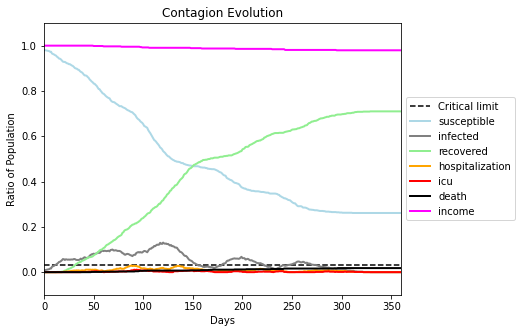

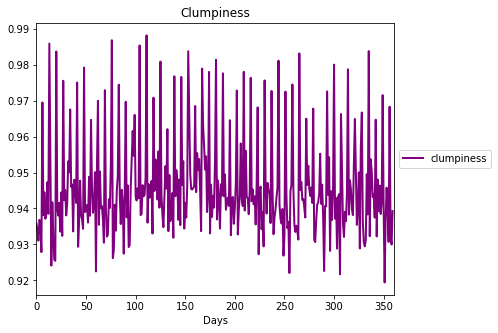

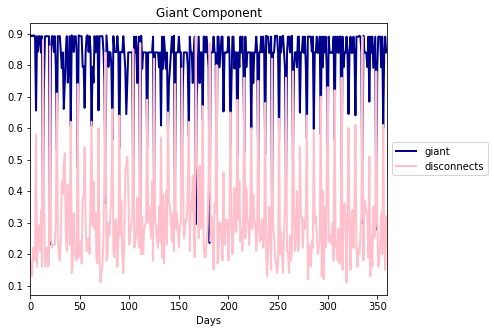

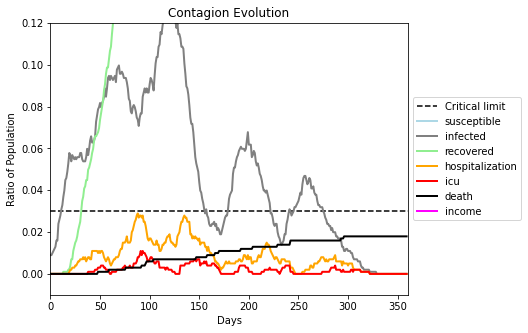

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[6064]
Average similarity between family members is 0.9916362478095734 at temperature -0.999
Average similarity between family and home is 0.9998913494760155 at temperature -1
Average similarity between students and their classroom is 0.8592363206991148 at temperature -0.999
Average classroom occupancy is 12.375 and number classrooms is 24
Average similarity between workers is 0.9986071065078919 at temperature -0.999
Average office occupancy is 10.338709677419354 and number offices is 62
Average friend similarity for adults: 0.9987486574952872 for kids: 0.905711112891625
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 1 people.
Total of 1 peop

avg restaurant similarity 0.5994947399775957
clumpiness 0.9455909583719195
maxlen 41
giant component 0.9424410540915396
disconnects 0.07
avg restaurant similarity 0.5902959830992248
clumpiness 0.9580951904333094
maxlen 43
giant component 0.848127600554785
disconnects 0.32
avg restaurant similarity 0.5659454505763638
clumpiness 0.944995779608667
maxlen 51
giant component 0.9424410540915396
disconnects 0.07
avg restaurant similarity 0.5610128961756097
clumpiness 0.9406138439482578
maxlen 46
giant component 0.9944521497919556
disconnects 0.02
avg restaurant similarity 0.637923077985261
clumpiness 0.9627346942939079
maxlen 41
giant component 0.7961165048543689
disconnects 0.41
avg restaurant similarity 0.5641442258974751
clumpiness 0.9485585648700922
maxlen 37
giant component 0.8439667128987517
disconnects 0.31
avg restaurant similarity 0.6857092599550147
clumpiness 0.9919964646464646
maxlen 25
giant component 0.1644927536231884
disconnects 0.93
avg restaurant similarity 0.5407700521192369

clumpiness 0.9451775350457291
maxlen 42
giant component 0.8966712898751734
disconnects 0.15
avg restaurant similarity 0.6033894796124399
clumpiness 0.9392651321626085
maxlen 62
giant component 0.9424410540915396
disconnects 0.05
avg restaurant similarity 0.6031870812926334
clumpiness 0.9914174071542493
maxlen 35
giant component 0.2927536231884058
disconnects 0.9
avg restaurant similarity 0.6695443966384235
clumpiness 0.9472508057250018
maxlen 35
giant component 0.8446601941747572
disconnects 0.3
avg restaurant similarity 0.53139528522584
clumpiness 0.9392494064912127
maxlen 53
giant component 0.9944521497919556
disconnects 0.02
avg restaurant similarity 0.4973223238640911
clumpiness 0.9378588334109826
maxlen 38
giant component 0.8987517337031901
disconnects 0.18
avg restaurant similarity 0.681057527038962
clumpiness 0.9370957394994401
maxlen 31
giant component 0.848127600554785
disconnects 0.24
avg restaurant similarity 0.5393985595828049
clumpiness 0.932449289143207
maxlen 41
giant co

clumpiness 0.9492633928800651
maxlen 44
giant component 0.8966712898751734
disconnects 0.2
avg restaurant similarity 0.6183864036565325
clumpiness 0.9378701195686777
maxlen 45
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5001733336626025
clumpiness 0.9422355221059248
maxlen 53
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6307194602748925
clumpiness 0.9526124946173775
maxlen 57
giant component 0.8439667128987517
disconnects 0.24
avg restaurant similarity 0.612562744939864
clumpiness 0.9478267487679052
maxlen 35
giant component 0.8446601941747572
disconnects 0.24
avg restaurant similarity 0.626679443816084
clumpiness 0.9690466382355898
maxlen 49
giant component 0.5036231884057971
disconnects 0.58
avg restaurant similarity 0.6385148545156161
clumpiness 0.949927118078303
maxlen 42
giant component 0.8966712898751734
disconnects 0.18
avg restaurant similarity 0.48669863684763826
clumpiness 0.9555694755691874
maxlen 49
giant 

clumpiness 0.9554282126808263
maxlen 43
giant component 0.8966712898751734
disconnects 0.16
avg restaurant similarity 0.6139546319045008
clumpiness 0.9852423132423133
maxlen 13
giant component 0.16231884057971013
disconnects 0.9
avg restaurant similarity 0.637687614674432
clumpiness 0.9471009337597454
maxlen 37
giant component 0.8966712898751734
disconnects 0.17
avg restaurant similarity 0.5062301235661089
clumpiness 0.9403646451830029
maxlen 48
giant component 0.8966712898751734
disconnects 0.2
avg restaurant similarity 0.6421749951527611
clumpiness 0.9588650010786461
maxlen 37
giant component 0.8446601941747572
disconnects 0.33
avg restaurant similarity 0.5482970757750967
clumpiness 0.9366479418818019
maxlen 53
giant component 0.9944521497919556
disconnects 0.03
avg restaurant similarity 0.6004019660529076
clumpiness 0.943716592383767
maxlen 41
giant component 0.8966712898751734
disconnects 0.16
avg restaurant similarity 0.6793217132986523
clumpiness 0.9447439595844734
maxlen 32
gian

clumpiness 0.9420927744312099
maxlen 40
giant component 0.8966712898751734
disconnects 0.2
avg restaurant similarity 0.645313592704756
clumpiness 0.9454739752832549
maxlen 44
giant component 0.9424410540915396
disconnects 0.11
avg restaurant similarity 0.6172076563971488
clumpiness 0.9490256038654886
maxlen 39
giant component 0.8467406380027739
disconnects 0.27
avg restaurant similarity 0.5838420170674666
clumpiness 0.9332977411614289
maxlen 29
giant component 0.8446601941747572
disconnects 0.25
avg restaurant similarity 0.6761410769717084
clumpiness 0.9895945094637045
maxlen 19
giant component 0.2746376811594203
disconnects 0.9
avg restaurant similarity 0.6604428084333482
clumpiness 0.9383166881706553
maxlen 46
giant component 0.9424410540915396
disconnects 0.09
avg restaurant similarity 0.582348659922187
clumpiness 0.9299456713315213
maxlen 40
giant component 0.8432732316227461
disconnects 0.23
avg restaurant similarity 0.5341257438969407
clumpiness 0.9314574384195208
maxlen 46
giant

clumpiness 0.9869423493173494
maxlen 16
giant component 0.16304347826086957
disconnects 0.9
avg restaurant similarity 0.5664938309462783
clumpiness 0.9455219417957321
maxlen 39
giant component 0.8966712898751734
disconnects 0.14
avg restaurant similarity 0.6661240872755493
clumpiness 0.9336748512318025
maxlen 47
giant component 0.9944521497919556
disconnects 0.01
avg restaurant similarity 0.5766321713706671
clumpiness 0.9545799775090162
maxlen 36
giant component 0.8446601941747572
disconnects 0.36
avg restaurant similarity 0.6896326181026652
clumpiness 0.9396481797236079
maxlen 52
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5209881877066304
clumpiness 0.9540408963402063
maxlen 52
giant component 0.8474341192787794
disconnects 0.27
avg restaurant similarity 0.5060286119451732
clumpiness 0.9367349135757947
maxlen 37
giant component 0.9424410540915396
disconnects 0.05
avg restaurant similarity 0.6346511321649595
clumpiness 0.9875860071301248
maxlen 17
gi

(<function dict.items>, <function dict.items>, <function dict.items>)

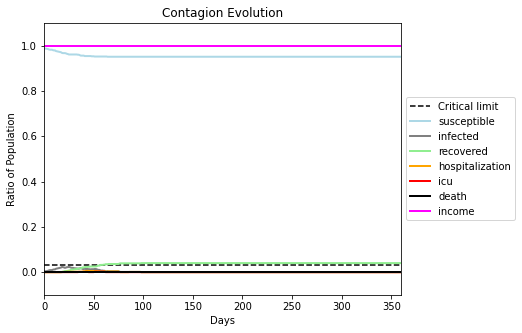

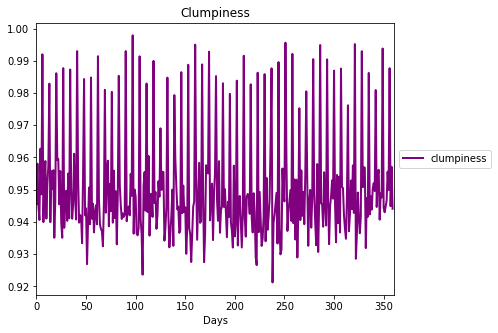

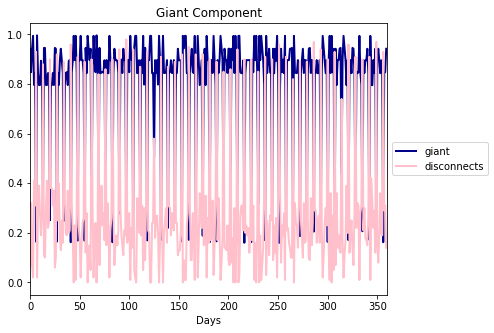

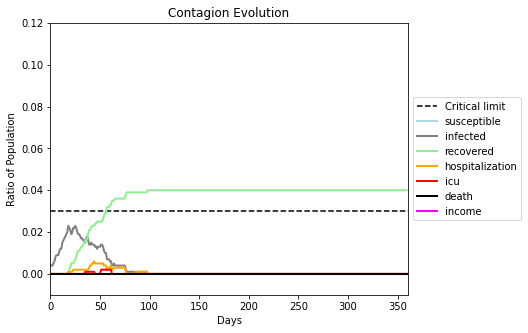

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[1380]
Average similarity between family members is 0.9917803421676935 at temperature -0.998
Average similarity between family and home is 0.9998993554388881 at temperature -1
Average similarity between students and their classroom is 0.649551084436 at temperature -0.998
Average classroom occupancy is 12.217391304347826 and number classrooms is 23
Average similarity between workers is 0.9633887294251479 at temperature -0.998
Average office occupancy is 10.2 and number offices is 65
Average friend similarity for adults: 0.9975916383334844 for kids: 0.8185142944626591
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 7 people.
Total of 7 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 7 people.
Total of 7 people al

run with seed 1380:
avg restaurant similarity 0.5454460678785482
clumpiness 0.931103074582796
maxlen 26
giant component 0.8908085694540429
disconnects 0.22
avg restaurant similarity 0.5270606807253168
clumpiness 0.9263480318078218
maxlen 35
giant component 0.9917069799585349
disconnects 0.02
avg restaurant similarity 0.5463692517976073
clumpiness 0.9199684505915258
maxlen 26
giant component 0.9412577747062889
disconnects 0.06
avg restaurant similarity 0.5692953969101608
clumpiness 0.9303275822356453
maxlen 27
giant component 0.8908085694540429
disconnects 0.15
avg restaurant similarity 0.6792510312646399
clumpiness 0.9387427922971048
maxlen 33
giant component 0.9917069799585349
disconnects 0.05
avg restaurant similarity 0.471970045596186
clumpiness 0.9270554810317462
maxlen 37
giant component 0.9917069799585349
disconnects 0.01
avg restaurant similarity 0.5181721158448551
clumpiness 0.9658642425084376
maxlen 25
giant component 0.4645441389290883
disconnects 0.71
avg restaurant similari

clumpiness 0.9197418054947502
maxlen 28
giant component 0.9419488597097443
disconnects 0.04
avg restaurant similarity 0.70771199077264
clumpiness 0.9374750964595173
maxlen 32
giant component 0.8914996544574982
disconnects 0.24
avg restaurant similarity 0.7553935965663487
clumpiness 0.9715745938264161
maxlen 35
giant component 0.4927641099855282
disconnects 0.69
avg restaurant similarity 0.540508725535261
clumpiness 0.9397059050740385
maxlen 32
giant component 0.8908085694540429
disconnects 0.22
avg restaurant similarity 0.6964238522671543
clumpiness 0.9373487459100831
maxlen 31
giant component 0.9412577747062889
disconnects 0.11
avg restaurant similarity 0.5492726046762728
clumpiness 0.9242920698159036
maxlen 33
giant component 0.9917069799585349
disconnects 0.01
avg restaurant similarity 0.6258409798061401
clumpiness 0.9295651479707215
maxlen 32
giant component 0.9917069799585349
disconnects 0.0
avg restaurant similarity 0.5731374672186307
clumpiness 0.9242093898582044
maxlen 29
giant

clumpiness 0.9324926465158218
maxlen 29
giant component 0.941908713692946
disconnects 0.17
avg restaurant similarity 0.4901288684186456
clumpiness 0.9257284288164387
maxlen 33
giant component 0.9419488597097443
disconnects 0.06
avg restaurant similarity 0.626150418746505
clumpiness 0.9345578242023028
maxlen 31
giant component 0.8914996544574982
disconnects 0.19
avg restaurant similarity 0.5459304982286425
clumpiness 0.9280409805715996
maxlen 33
giant component 0.9419488597097443
disconnects 0.11
avg restaurant similarity 0.44194189265098754
clumpiness 0.9224700007856115
maxlen 39
giant component 0.9917069799585349
disconnects 0.02
avg restaurant similarity 0.587751580867469
clumpiness 0.9744464517548436
maxlen 29
giant component 0.3548153511947864
disconnects 0.75
avg restaurant similarity 0.5605657550327098
clumpiness 0.9104600689576797
maxlen 28
giant component 0.9917069799585349
disconnects 0.02
avg restaurant similarity 0.5032207959990388
clumpiness 0.9314716851440102
maxlen 37
gia

clumpiness 0.936453770361295
maxlen 33
giant component 0.9419488597097443
disconnects 0.18
avg restaurant similarity 0.49282834266804754
clumpiness 0.9752223105841527
maxlen 21
giant component 0.2662807525325615
disconnects 0.82
avg restaurant similarity 0.5892668380747828
clumpiness 0.9265956068099491
maxlen 38
giant component 0.9917069799585349
disconnects 0.02
avg restaurant similarity 0.5494250597746649
clumpiness 0.9332758986646137
maxlen 34
giant component 0.9419488597097443
disconnects 0.09
avg restaurant similarity 0.6148567878657657
clumpiness 0.9256974704443213
maxlen 29
giant component 0.9917069799585349
disconnects 0.0
avg restaurant similarity 0.45093985623403227
clumpiness 0.9328529011565163
maxlen 35
giant component 0.9412577747062889
disconnects 0.12
avg restaurant similarity 0.4989530205994096
clumpiness 0.9261355142378871
maxlen 38
giant component 0.9917069799585349
disconnects 0.01
avg restaurant similarity 0.6086026906441798
clumpiness 0.9302247713081826
maxlen 32
g

clumpiness 0.939310445860231
maxlen 32
giant component 0.9419488597097443
disconnects 0.17
avg restaurant similarity 0.5420483904952248
clumpiness 0.93818262113734
maxlen 34
giant component 0.9412171507607192
disconnects 0.14
avg restaurant similarity 0.5145586205306264
clumpiness 0.9172800114920252
maxlen 30
giant component 0.9917069799585349
disconnects 0.01
avg restaurant similarity 0.5303905271362563
clumpiness 0.9253901175662853
maxlen 26
giant component 0.9412171507607192
disconnects 0.13
avg restaurant similarity 0.5359174207137197
clumpiness 0.9781108823104038
maxlen 36
giant component 0.47539797395079597
disconnects 0.75
avg restaurant similarity 0.5852078463640442
clumpiness 0.9262058895395304
maxlen 29
giant component 0.9419488597097443
disconnects 0.09
avg restaurant similarity 0.6247603659990906
clumpiness 0.9224726288287001
maxlen 35
giant component 0.941908713692946
disconnects 0.02
avg restaurant similarity 0.5038015904138312
clumpiness 0.936168576872451
maxlen 32
giant

clumpiness 0.9308676068079565
maxlen 36
giant component 0.939875604699378
disconnects 0.1
avg restaurant similarity 0.5558898080941412
clumpiness 0.9404417594069432
maxlen 28
giant component 0.9405666897028334
disconnects 0.16
avg restaurant similarity 0.5430643593070891
clumpiness 0.9305650561783964
maxlen 35
giant component 0.9903248099516241
disconnects 0.03
avg restaurant similarity 0.46710454180048305
clumpiness 0.9327609107728277
maxlen 34
giant component 0.9405666897028334
disconnects 0.19
avg restaurant similarity 0.5305963814175982
clumpiness 0.9321693913292065
maxlen 31
giant component 0.9405666897028334
disconnects 0.13
avg restaurant similarity 0.6347426115857493
clumpiness 0.9326732384564529
maxlen 27
giant component 0.939875604699378
disconnects 0.14
avg restaurant similarity 0.5939126894497763
clumpiness 0.9832264402264402
maxlen 13
giant component 0.15340086830680175
disconnects 0.92
avg restaurant similarity 0.6801102779751999
clumpiness 0.9324853772114676
maxlen 35
gi

(<function dict.items>, <function dict.items>, <function dict.items>)

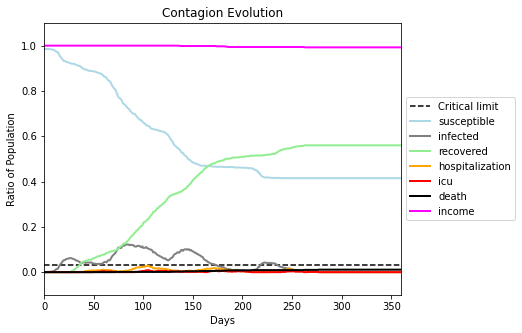

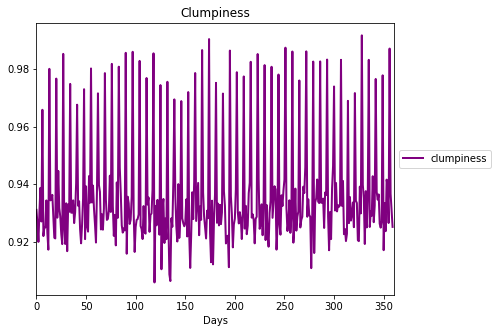

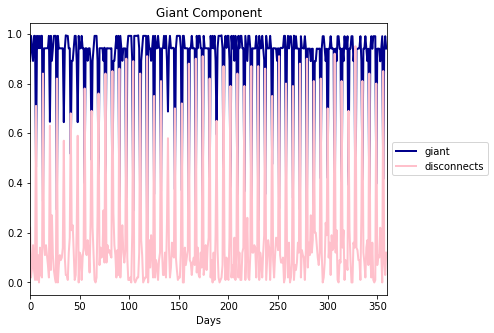

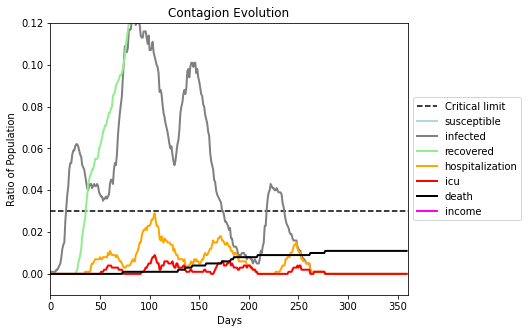

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[8190]
Average similarity between family members is 0.9851377169326183 at temperature -0.9975
Average similarity between family and home is 0.9999067610864699 at temperature -1
Average similarity between students and their classroom is 0.719694280510961 at temperature -0.9975
Average classroom occupancy is 13.227272727272727 and number classrooms is 22
Average similarity between workers is 0.9933472968977363 at temperature -0.9975
Average office occupancy is 9.787878787878787 and number offices is 66
Average friend similarity for adults: 0.9960878961444811 for kids: 0.7885907382828669
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
T

avg restaurant similarity 0.5773108720153821
clumpiness 0.9144775459038651
maxlen 24
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.5454840137865977
clumpiness 0.9153530848666298
maxlen 22
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.5064648052366201
clumpiness 0.9153521618400944
maxlen 27
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.6264692891237672
clumpiness 0.903408436949001
maxlen 25
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.692354266869172
clumpiness 0.9164456351481187
maxlen 23
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.6010472255599083
clumpiness 0.9110809344594174
maxlen 22
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.617343398856901
clumpiness 0.9695745088984647
maxlen 33
giant component 0.7165697674418605
disconnects 0.53
avg restaurant similarity 0.4937718314254895
clu

clumpiness 0.9155632809031711
maxlen 29
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.5716003890305991
clumpiness 0.9135784942331416
maxlen 26
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.6036311195161647
clumpiness 0.9686250348762286
maxlen 39
giant component 0.6344476744186046
disconnects 0.61
avg restaurant similarity 0.585758667834664
clumpiness 0.9192719131000866
maxlen 28
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.5870755663264291
clumpiness 0.9127030437467298
maxlen 29
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.7764539306787448
clumpiness 0.9259852533507433
maxlen 28
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.37577754097144783
clumpiness 0.914458270955101
maxlen 27
giant component 0.9979195561719834
disconnects 0.0
avg restaurant similarity 0.5200849693574913
clumpiness 0.9085933957081791
maxlen 25
giant

clumpiness 0.9135515720789782
maxlen 27
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.4800135039313392
clumpiness 0.9113989259078269
maxlen 27
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.5810983094711489
clumpiness 0.925223191640997
maxlen 24
giant component 0.9958391123439667
disconnects 0.03
avg restaurant similarity 0.46841332375605255
clumpiness 0.9147569569062232
maxlen 31
giant component 0.9958362248438585
disconnects 0.0
avg restaurant similarity 0.4865208454537579
clumpiness 0.9130369110719284
maxlen 29
giant component 0.9958391123439667
disconnects 0.01
avg restaurant similarity 0.5171456519215026
clumpiness 0.965632852088156
maxlen 39
giant component 0.7418181818181818
disconnects 0.47
avg restaurant similarity 0.6474785075274904
clumpiness 0.9316303054549286
maxlen 23
giant component 0.9958391123439667
disconnects 0.0
avg restaurant similarity 0.555869439792817
clumpiness 0.9216329938289827
maxlen 26
giant 

clumpiness 0.9623997258754216
maxlen 43
giant component 0.6300872093023255
disconnects 0.59
avg restaurant similarity 0.595360165358802
clumpiness 0.9212014809442862
maxlen 27
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6710887705236055
clumpiness 0.9174168450376949
maxlen 29
giant component 0.9965325936199723
disconnects 0.03
avg restaurant similarity 0.47949272158193784
clumpiness 0.9104156965194958
maxlen 23
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5710548772532491
clumpiness 0.9202089448231932
maxlen 28
giant component 0.9944521497919556
disconnects 0.02
avg restaurant similarity 0.6029395181826609
clumpiness 0.9140530394317206
maxlen 31
giant component 0.9944521497919556
disconnects 0.01
avg restaurant similarity 0.553986320267805
clumpiness 0.90867200759972
maxlen 25
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5606827163025766
clumpiness 0.9704983171581022
maxlen 29
giant c

clumpiness 0.9163004579826629
maxlen 25
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6334163476336024
clumpiness 0.9060934915206689
maxlen 24
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6608833438412965
clumpiness 0.9657759707893562
maxlen 31
giant component 0.7630813953488372
disconnects 0.49
avg restaurant similarity 0.6409418875032824
clumpiness 0.9169391991714781
maxlen 26
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5262148808350366
clumpiness 0.9125057500497937
maxlen 27
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6366780767607794
clumpiness 0.9242687546887238
maxlen 25
giant component 0.9944521497919556
disconnects 0.03
avg restaurant similarity 0.5660681159959522
clumpiness 0.9134957646969325
maxlen 26
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5952804336469799
clumpiness 0.9280749369019629
maxlen 30
giant 

avg restaurant similarity 0.5888081912728188
clumpiness 0.9136033993096687
maxlen 26
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6204820965468774
clumpiness 0.9196591695713987
maxlen 26
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.5281134112092388
clumpiness 0.9151526563220063
maxlen 25
giant component 0.9944521497919556
disconnects 0.02
avg restaurant similarity 0.6325295452846701
clumpiness 0.920267922952147
maxlen 25
giant component 0.9944521497919556
disconnects 0.0
avg restaurant similarity 0.6642859663718546
clumpiness 0.9676655266257503
maxlen 43
giant component 0.7594476744186046
disconnects 0.53
avg restaurant similarity 0.6366893180209449
clumpiness 0.9136100015952251
maxlen 25
giant component 0.9944521497919556
disconnects 0.03
avg restaurant similarity 0.637842630350599
clumpiness 0.9193832272108622
maxlen 30
giant component 0.9944482997918113
disconnects 0.02
avg restaurant similarity 0.5924544772775501
c

(<function dict.items>, <function dict.items>, <function dict.items>)

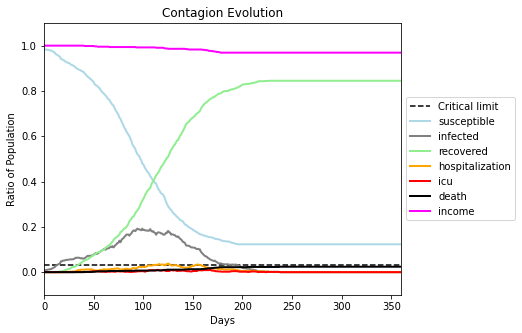

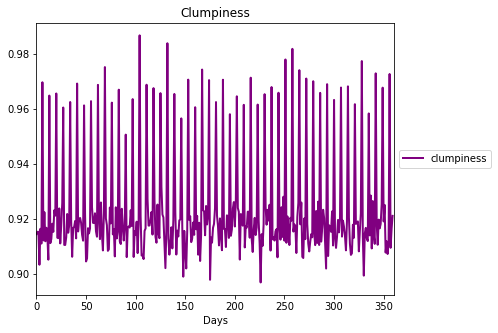

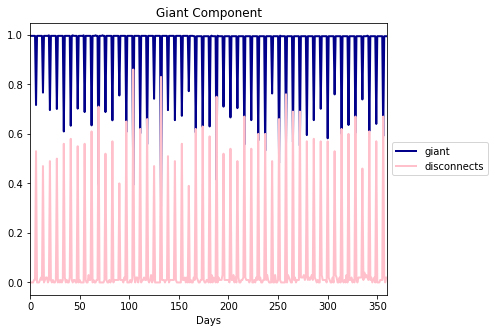

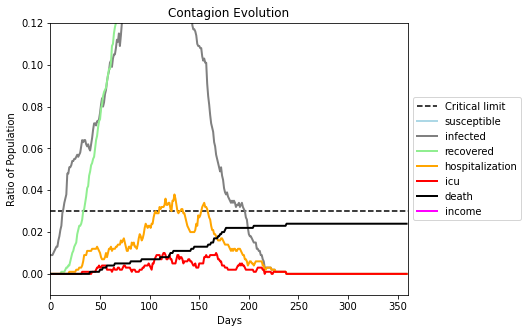

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[621]
Average similarity between family members is 0.9886116382144651 at temperature -0.997
Average similarity between family and home is 0.9999014930316978 at temperature -1
Average similarity between students and their classroom is 0.716760206152564 at temperature -0.997
Average classroom occupancy is 11.583333333333334 and number classrooms is 24
Average similarity between workers is 0.9997641030263806 at temperature -0.997
Average office occupancy is 10.045454545454545 and number offices is 66
Average friend similarity for adults: 0.9997827675495056 for kids: 0.7695631135087786
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Tota

run with seed 621:
avg restaurant similarity 0.616103513885775
clumpiness 0.9157980919311516
maxlen 30
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5208729309866034
clumpiness 0.9202660054255175
maxlen 41
giant component 0.9986291980808774
disconnects 0.02
avg restaurant similarity 0.6405863555424234
clumpiness 0.9080056905748117
maxlen 24
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.534942146868842
clumpiness 0.9211740322784508
maxlen 28
giant component 0.9986291980808774
disconnects 0.01
avg restaurant similarity 0.5122224041905439
clumpiness 0.9275399355714506
maxlen 30
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5630991346355769
clumpiness 0.9223641968719609
maxlen 33
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5473985595656515
clumpiness 0.9842303332666923
maxlen 39
giant component 0.4867193108399139
disconnects 0.77
avg restaurant similarity 0.

clumpiness 0.9307703671173654
maxlen 27
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5717820576563047
clumpiness 0.9166273151407613
maxlen 33
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5342599604176813
clumpiness 0.972887479293439
maxlen 27
giant component 0.49748743718592964
disconnects 0.69
avg restaurant similarity 0.6298063996528585
clumpiness 0.9217834846099485
maxlen 41
giant component 0.9986291980808774
disconnects 0.01
avg restaurant similarity 0.39716392597081795
clumpiness 0.9414371684513062
maxlen 45
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.637097621925727
clumpiness 0.9146215722010749
maxlen 30
giant component 0.9986291980808774
disconnects 0.02
avg restaurant similarity 0.5401382130262289
clumpiness 0.9151275328912627
maxlen 31
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5232433269840074
clumpiness 0.9234431376571965
maxlen 38
giant

avg restaurant similarity 0.6038342916999105
clumpiness 0.9261706494893269
maxlen 37
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6843292256821685
clumpiness 0.9231109355401811
maxlen 41
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6400607798230307
clumpiness 0.9230904173598361
maxlen 29
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5626259276230193
clumpiness 0.9302136746643993
maxlen 31
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5271180727535316
clumpiness 0.9744699715638604
maxlen 23
giant component 0.5642498205312275
disconnects 0.68
avg restaurant similarity 0.5355876515736658
clumpiness 0.9261962318326856
maxlen 34
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5612067777491861
clumpiness 0.9270098786944455
maxlen 38
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6392480297153392
cl

avg restaurant similarity 0.5948034423509948
clumpiness 0.9174768884401272
maxlen 28
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5465461272438658
clumpiness 0.9195014845217699
maxlen 27
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.7563422816900915
clumpiness 0.9178052181403902
maxlen 29
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6307620067078459
clumpiness 0.9323727392146072
maxlen 43
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5542738079145877
clumpiness 0.9229426087587886
maxlen 37
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5650958327860992
clumpiness 0.9305373063952906
maxlen 38
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.47888950265224656
clumpiness 0.9800304013874481
maxlen 28
giant component 0.3962670495333812
disconnects 0.8
avg restaurant similarity 0.6340541673154166
cl

clumpiness 0.9238112266664251
maxlen 36
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5509853971194546
clumpiness 0.9163676932283105
maxlen 26
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6028281024462117
clumpiness 0.9713590078349433
maxlen 26
giant component 0.5441493180186647
disconnects 0.62
avg restaurant similarity 0.5919141081818775
clumpiness 0.9264494113855883
maxlen 39
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.46778609286033246
clumpiness 0.9281079058165458
maxlen 45
giant component 0.9986291980808774
disconnects 0.01
avg restaurant similarity 0.5446167545293756
clumpiness 0.9281650459303599
maxlen 31
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6292063641705002
clumpiness 0.9272987317664256
maxlen 38
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6374842554668613
clumpiness 0.9160183581198622
maxlen 34
giant

avg restaurant similarity 0.5442474809511324
clumpiness 0.9273615386502864
maxlen 33
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.581858774439211
clumpiness 0.9264167801183917
maxlen 44
giant component 0.9986291980808774
disconnects 0.01
avg restaurant similarity 0.6011937632820542
clumpiness 0.9287548455399729
maxlen 37
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5898386803951401
clumpiness 0.9261015317242551
maxlen 34
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5867882135823738
clumpiness 0.9772120839963047
maxlen 33
giant component 0.4680545585068198
disconnects 0.69
avg restaurant similarity 0.5401214869637123
clumpiness 0.9210015869460609
maxlen 35
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.5695455990992981
clumpiness 0.9295562812568819
maxlen 34
giant component 0.9986291980808774
disconnects 0.0
avg restaurant similarity 0.6238711786612204
cl

(<function dict.items>, <function dict.items>, <function dict.items>)

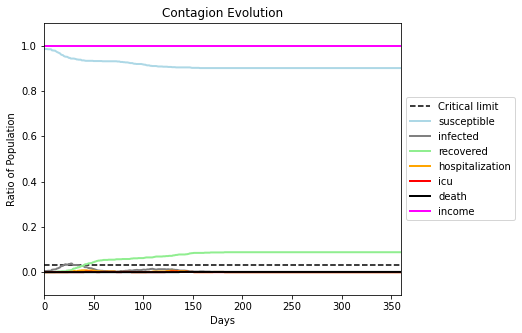

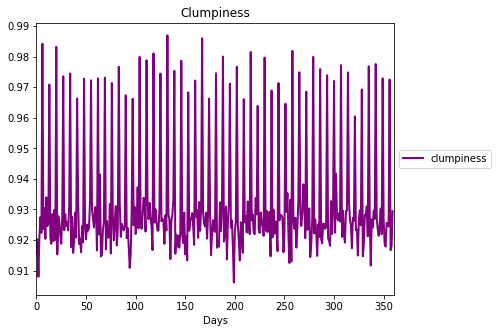

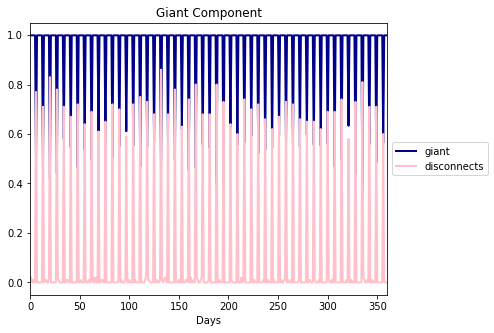

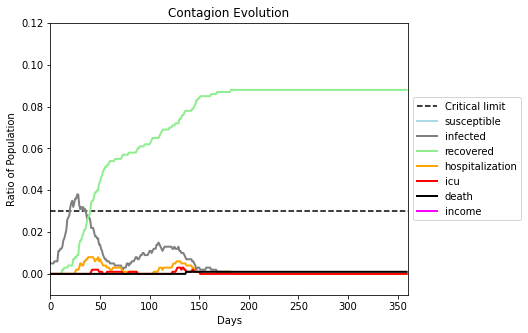

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[7445]
Average similarity between family members is 0.987723972807113 at temperature -0.996
Average similarity between family and home is 0.9998920338016832 at temperature -1
Average similarity between students and their classroom is 0.6305366486570584 at temperature -0.996
Average classroom occupancy is 11.541666666666666 and number classrooms is 24
Average similarity between workers is 0.96623122755542 at temperature -0.996
Average office occupancy is 10.261538461538462 and number offices is 65
Average friend similarity for adults: 0.9913216546183062 for kids: 0.7580227420815324
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

avg restaurant similarity 0.44153934581949694
clumpiness 0.9153643575517036
maxlen 29
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.3912471880836729
clumpiness 0.9170101558176156
maxlen 29
giant component 0.9470061940812113
disconnects 0.12
avg restaurant similarity 0.4615264602915952
clumpiness 0.9242496726139209
maxlen 26
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.45921800501256316
clumpiness 0.9194241334259137
maxlen 25
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.6435656913116952
clumpiness 0.9259549218904516
maxlen 27
giant component 0.9979338842975206
disconnects 0.0
avg restaurant similarity 0.5308627896928307
clumpiness 0.9194076986350274
maxlen 25
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.47044781491957766
clumpiness 0.9758437596115614
maxlen 19
giant component 0.3530259365994236
disconnects 0.83
avg restaurant similarity 0.553993335404268

avg restaurant similarity 0.40798300631099294
clumpiness 0.9273030070051843
maxlen 25
giant component 0.9470061940812113
disconnects 0.1
avg restaurant similarity 0.5242931740570737
clumpiness 0.9195388256171573
maxlen 30
giant component 0.9979353062629044
disconnects 0.01
avg restaurant similarity 0.4942271262151039
clumpiness 0.9698625176003852
maxlen 43
giant component 0.6217579250720461
disconnects 0.53
avg restaurant similarity 0.672582864302864
clumpiness 0.9200521057288086
maxlen 30
giant component 0.9979353062629044
disconnects 0.03
avg restaurant similarity 0.7182873258866624
clumpiness 0.9151754932822371
maxlen 26
giant component 0.9979353062629044
disconnects 0.01
avg restaurant similarity 0.533824465368112
clumpiness 0.925194511266761
maxlen 29
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.17811667953795815
clumpiness 0.9327531780479283
maxlen 25
giant component 0.9470061940812113
disconnects 0.1
avg restaurant similarity 0.45656936742132115

avg restaurant similarity 0.5575062358581948
clumpiness 0.9332120572699274
maxlen 31
giant component 0.9979353062629044
disconnects 0.02
avg restaurant similarity 0.4648103145771323
clumpiness 0.9188255876304638
maxlen 25
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.5332922140559173
clumpiness 0.9259451366037481
maxlen 27
giant component 0.9470061940812113
disconnects 0.12
avg restaurant similarity 0.7560434669332143
clumpiness 0.9240394108782789
maxlen 27
giant component 0.9979353062629044
disconnects 0.01
avg restaurant similarity 0.43202280730292164
clumpiness 0.920776433666143
maxlen 27
giant component 0.9979353062629044
disconnects 0.0
avg restaurant similarity 0.5789013903772262
clumpiness 0.9749368867584365
maxlen 29
giant component 0.4953136265320836
disconnects 0.69
avg restaurant similarity 0.5615243980296334
clumpiness 0.9246970005329694
maxlen 32
giant component 0.9979353062629044
disconnects 0.02
avg restaurant similarity 0.446464398421358

clumpiness 0.9069160010354284
maxlen 25
giant component 0.9958706125258087
disconnects 0.0
avg restaurant similarity 0.5530724062555994
clumpiness 0.9708620559605214
maxlen 26
giant component 0.5544340302811824
disconnects 0.64
avg restaurant similarity 0.33868521723478895
clumpiness 0.917398964837678
maxlen 26
giant component 0.9449035812672176
disconnects 0.07
avg restaurant similarity 0.43238486887288796
clumpiness 0.9262525000203826
maxlen 28
giant component 0.9958677685950413
disconnects 0.02
avg restaurant similarity 0.5047466375101357
clumpiness 0.9084375361725028
maxlen 31
giant component 0.9958706125258087
disconnects 0.01
avg restaurant similarity 0.4625100284381178
clumpiness 0.9190915196831606
maxlen 27
giant component 0.9449415003441156
disconnects 0.08
avg restaurant similarity 0.47443610435291167
clumpiness 0.9178884329550738
maxlen 25
giant component 0.9449035812672176
disconnects 0.08
avg restaurant similarity 0.6657881394739991
clumpiness 0.9060796366665596
maxlen 24


clumpiness 0.9084152868519136
maxlen 25
giant component 0.9958706125258087
disconnects 0.0
avg restaurant similarity 0.6104484371359696
clumpiness 0.9154540405022805
maxlen 26
giant component 0.9958706125258087
disconnects 0.01
avg restaurant similarity 0.4447714940170296
clumpiness 0.9167360941552927
maxlen 27
giant component 0.9958706125258087
disconnects 0.0
avg restaurant similarity 0.5498927097633741
clumpiness 0.9152541739541774
maxlen 26
giant component 0.9958706125258087
disconnects 0.01
avg restaurant similarity 0.38436371758665233
clumpiness 0.9684971286259539
maxlen 40
giant component 0.520893371757925
disconnects 0.65
avg restaurant similarity 0.4445247838178712
clumpiness 0.9219612048530881
maxlen 25
giant component 0.9958706125258087
disconnects 0.0
avg restaurant similarity 0.4270207237453684
clumpiness 0.9085471154297826
maxlen 31
giant component 0.9958677685950413
disconnects 0.01
avg restaurant similarity 0.568938990772829
clumpiness 0.9184819314901359
maxlen 27
giant

clumpiness 0.9801863262374299
maxlen 31
giant component 0.4495677233429395
disconnects 0.78
avg restaurant similarity 0.6389306688562382
clumpiness 0.924250150461874
maxlen 29
giant component 0.9958706125258087
disconnects 0.01
avg restaurant similarity 0.679179615398593
clumpiness 0.9222973127200302
maxlen 29
giant component 0.9958706125258087
disconnects 0.02
avg restaurant similarity 0.4230488988485405
clumpiness 0.9203546023820086
maxlen 27
giant component 0.9449035812672176
disconnects 0.09
avg restaurant similarity 0.5144703290896679
clumpiness 0.9097845181799551
maxlen 25
giant component 0.9958706125258087
disconnects 0.0
avg restaurant similarity 0.32886405405122876
clumpiness 0.9257473857622278
maxlen 30
giant component 0.9958706125258087
disconnects 0.01
avg restaurant similarity 0.49913474751932196
clumpiness 0.931887286042953
maxlen 26
giant component 0.9449415003441156
disconnects 0.15
avg restaurant similarity 0.5312403459785735
clumpiness 0.977304938591056
maxlen 35
gian

(<function dict.items>, <function dict.items>, <function dict.items>)

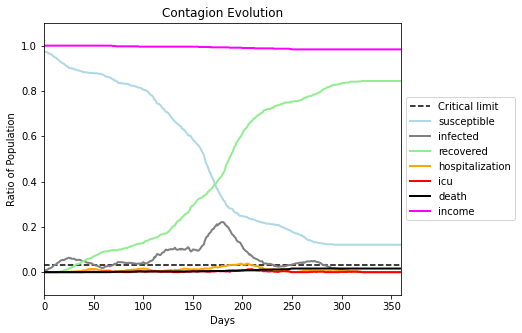

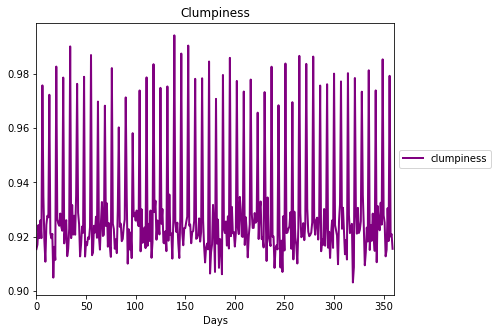

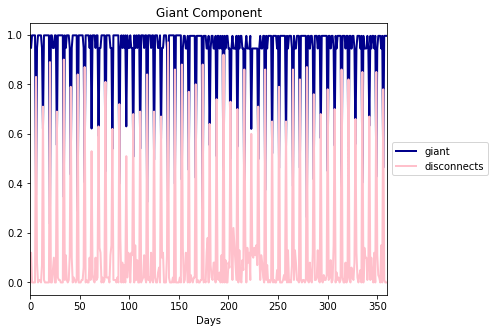

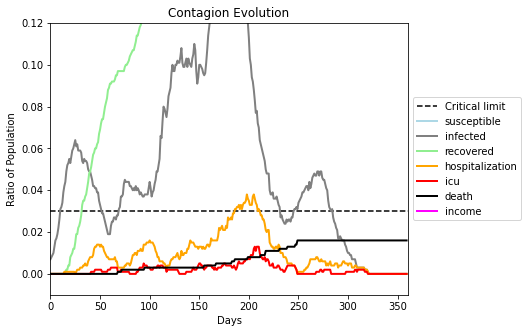

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[8063]
Average similarity between family members is 0.9872178395561756 at temperature -0.995
Average similarity between family and home is 0.999902981128698 at temperature -1
Average similarity between students and their classroom is 0.6041024528429872 at temperature -0.995
Average classroom occupancy is 13.083333333333334 and number classrooms is 24
Average similarity between workers is 0.9642870267478595 at temperature -0.995
Average office occupancy is 9.545454545454545 and number offices is 66
Average friend similarity for adults: 0.9886078630952185 for kids: 0.7269691805462365
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tota

avg restaurant similarity 0.30998634614323595
clumpiness 0.9123973208593953
maxlen 19
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.3783750537844974
clumpiness 0.9106769470639441
maxlen 19
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.550466510469939
clumpiness 0.9035484295116649
maxlen 18
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.44896796509618353
clumpiness 0.9020934678067032
maxlen 20
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.316234162750857
clumpiness 0.9142505082035268
maxlen 26
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.440438772217578
clumpiness 0.9085561944505444
maxlen 21
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.6499523215165298
clumpiness 0.9528409671123361
maxlen 30
giant component 0.6600877192982456
disconnects 0.49
avg restaurant similarity 0.5182886667127168
clumpiness 

avg restaurant similarity 0.42671337192456366
clumpiness 0.9217531108531917
maxlen 23
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.3208570874205134
clumpiness 0.973251131689423
maxlen 40
giant component 0.5925384052670081
disconnects 0.64
avg restaurant similarity 0.3642082837283854
clumpiness 0.9125715819955759
maxlen 25
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.4052090433348038
clumpiness 0.9157347211611918
maxlen 20
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.30419615225839874
clumpiness 0.9157129245883117
maxlen 22
giant component 0.99302649930265
disconnects 0.03
avg restaurant similarity 0.590633846730952
clumpiness 0.9137447627771191
maxlen 23
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.22214305895059
clumpiness 0.9112080306473563
maxlen 24
giant component 0.9930167597765364
disconnects 0.01
avg restaurant similarity 0.40856017126057576
clumpines

clumpiness 0.9015737818253299
maxlen 19
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.4084706180796241
clumpiness 0.8984541277865581
maxlen 20
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.6134124405669905
clumpiness 0.9057691573562316
maxlen 22
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.5394671321636084
clumpiness 0.9091780204207482
maxlen 25
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.3809399607310018
clumpiness 0.9829336295065725
maxlen 29
giant component 0.4546783625730994
disconnects 0.8
avg restaurant similarity 0.37266144123318795
clumpiness 0.9025772303891499
maxlen 22
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.38224358517117185
clumpiness 0.9044036810432355
maxlen 23
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.5259417838724144
clumpiness 0.9153491646681343
maxlen 26
giant component 

clumpiness 0.9133869261692825
maxlen 24
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.3642412992478702
clumpiness 0.9103815111187403
maxlen 22
giant component 0.99302649930265
disconnects 0.04
avg restaurant similarity 0.4009092400290527
clumpiness 0.9159532821387345
maxlen 25
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.6024641968613912
clumpiness 0.9178125207243663
maxlen 25
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.513280209951001
clumpiness 0.9055453766238698
maxlen 23
giant component 0.99302649930265
disconnects 0.03
avg restaurant similarity 0.37321768568364355
clumpiness 0.9136931100375374
maxlen 22
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.4742197317788194
clumpiness 0.9736801776053324
maxlen 25
giant component 0.5562865497076024
disconnects 0.73
avg restaurant similarity 0.5250349470311627
clumpiness 0.9171165371044057
maxlen 24
giant compone

avg restaurant similarity 0.30054313219346757
clumpiness 0.9149675675758562
maxlen 25
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.3490145072313127
clumpiness 0.9669187789346011
maxlen 29
giant component 0.7119883040935673
disconnects 0.6
avg restaurant similarity 0.39710024408594147
clumpiness 0.9107131654178868
maxlen 27
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.4772125107073627
clumpiness 0.9177329360096389
maxlen 26
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.4432040526152998
clumpiness 0.9114691363716974
maxlen 23
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.29542309119364657
clumpiness 0.9101042440531605
maxlen 20
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.5103263544366969
clumpiness 0.9069124672626996
maxlen 20
giant component 0.99302649930265
disconnects 0.01
avg restaurant similarity 0.3362891500384833
clumpine

avg restaurant similarity 0.46440939512320784
clumpiness 0.9039780640755873
maxlen 22
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.2900958267399099
clumpiness 0.9051872058110448
maxlen 22
giant component 0.99302649930265
disconnects 0.0
avg restaurant similarity 0.45917598802253523
clumpiness 0.9055165245830882
maxlen 24
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.4593922310202883
clumpiness 0.9514752629400869
maxlen 33
giant component 0.7653508771929824
disconnects 0.47
avg restaurant similarity 0.4443735098067791
clumpiness 0.9077593097476999
maxlen 22
giant component 0.99302649930265
disconnects 0.04
avg restaurant similarity 0.24048056129706522
clumpiness 0.9075254597054133
maxlen 21
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.2933842474468253
clumpiness 0.914008936153286
maxlen 22
giant component 0.99302649930265
disconnects 0.02
avg restaurant similarity 0.48370128808856766
clumpin

(<function dict.items>, <function dict.items>, <function dict.items>)

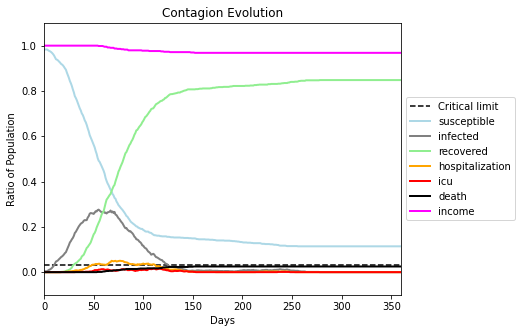

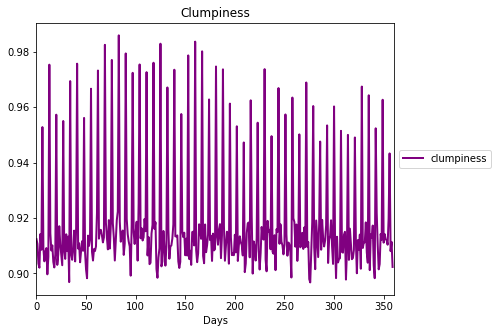

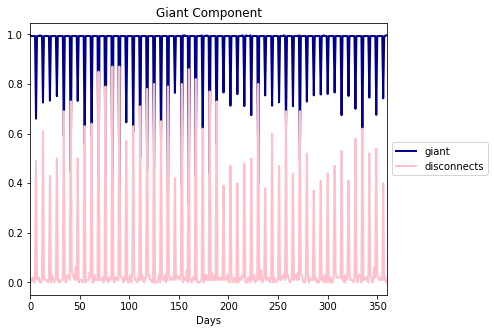

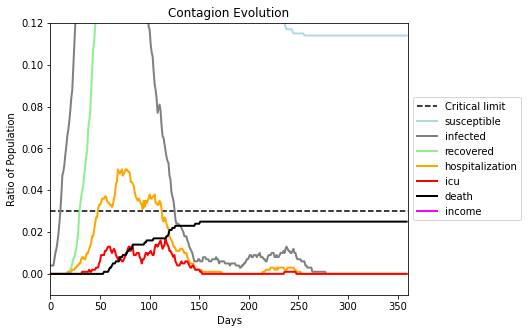

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[9533]
Average similarity between family members is 0.9834633712222166 at temperature -0.994
Average similarity between family and home is 0.9998937019428237 at temperature -1
Average similarity between students and their classroom is 0.5086117798704298 at temperature -0.994
Average classroom occupancy is 11.458333333333334 and number classrooms is 24
Average similarity between workers is 0.9472734721464185 at temperature -0.994
Average office occupancy is 10.196969696969697 and number offices is 66
Average friend similarity for adults: 0.981133665733565 for kids: 0.6765486791720773
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Tot

avg restaurant similarity 0.534846616577731
clumpiness 0.9060249809529995
maxlen 21
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.5654145323368424
clumpiness 0.9080561201074393
maxlen 26
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.4759618901772206
clumpiness 0.9006178951767188
maxlen 20
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.5257037883457024
clumpiness 0.9003092483711679
maxlen 19
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.4876256515220457
clumpiness 0.9001587646529599
maxlen 21
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.4724584089133073
clumpiness 0.8966450216450217
maxlen 20
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.5422319610182491
clumpiness 0.9639840833401205
maxlen 26
giant component 0.6685714285714286
disconnects 0.58
avg restaurant similarity 0.5985557491208959
clu

clumpiness 0.910099081688865
maxlen 20
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.49300425873737785
clumpiness 0.9087480936246417
maxlen 19
giant component 0.9986357435197817
disconnects 0.01
avg restaurant similarity 0.7235979938955669
clumpiness 0.9725114786290776
maxlen 35
giant component 0.5368120085775554
disconnects 0.74
avg restaurant similarity 0.3961216783064495
clumpiness 0.9080350725985402
maxlen 21
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.36931910388038214
clumpiness 0.9109991613993162
maxlen 19
giant component 0.9986348122866894
disconnects 0.01
avg restaurant similarity 0.40528117267648134
clumpiness 0.9109304673803934
maxlen 23
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.4489092512195453
clumpiness 0.9172231742435337
maxlen 23
giant component 0.9986357435197817
disconnects 0.02
avg restaurant similarity 0.48138109926530553
clumpiness 0.9086539104600251
maxlen 21
g

avg restaurant similarity 0.46349897753744324
clumpiness 0.9103399984947973
maxlen 22
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.524252416416263
clumpiness 0.908074709973549
maxlen 25
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.7609770390805322
clumpiness 0.9068719030367638
maxlen 20
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5542113069222909
clumpiness 0.901477267830209
maxlen 22
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.6473676632142269
clumpiness 0.9742830645995
maxlen 35
giant component 0.5992857142857143
disconnects 0.69
avg restaurant similarity 0.5690380374764225
clumpiness 0.906670319060025
maxlen 24
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.5175011937233139
clumpiness 0.9091304329055878
maxlen 21
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.5351736742892703
clump

avg restaurant similarity 0.632177087465587
clumpiness 0.9050698291646434
maxlen 26
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.5138776623027641
clumpiness 0.9090858381814265
maxlen 20
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5492313596172685
clumpiness 0.9133225418372478
maxlen 18
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.39450438060618803
clumpiness 0.8908436775642659
maxlen 22
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.5365503319094812
clumpiness 0.905990542996735
maxlen 24
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.6028273443087884
clumpiness 0.9031523859417082
maxlen 23
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.47926903129961757
clumpiness 0.9576938910024083
maxlen 27
giant component 0.6671428571428571
disconnects 0.52
avg restaurant similarity 0.47853573436677

clumpiness 0.9088984048436869
maxlen 23
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.6565051248369288
clumpiness 0.9087144907895682
maxlen 21
giant component 0.9972714870395635
disconnects 0.02
avg restaurant similarity 0.5725396296703505
clumpiness 0.9674322657047115
maxlen 20
giant component 0.6321428571428571
disconnects 0.59
avg restaurant similarity 0.4501832735706372
clumpiness 0.9111926942252794
maxlen 26
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5009698874042291
clumpiness 0.9007891954966258
maxlen 20
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5867166486409099
clumpiness 0.8911940396205102
maxlen 21
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5216676443410797
clumpiness 0.8988719311734019
maxlen 21
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.4805827003721916
clumpiness 0.9035298158154196
maxlen 21
giant

avg restaurant similarity 0.49726725683649264
clumpiness 0.8990420129835766
maxlen 21
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.5764019419925099
clumpiness 0.9017949987319183
maxlen 19
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.47815657980049525
clumpiness 0.909979915122717
maxlen 20
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.5447269898647514
clumpiness 0.905737338856534
maxlen 20
giant component 0.9972714870395635
disconnects 0.02
avg restaurant similarity 0.43885722185176795
clumpiness 0.9587511640555791
maxlen 23
giant component 0.6792857142857143
disconnects 0.54
avg restaurant similarity 0.6137584585708092
clumpiness 0.9004300828170798
maxlen 19
giant component 0.9972714870395635
disconnects 0.0
avg restaurant similarity 0.5328099330913548
clumpiness 0.9028841612034337
maxlen 21
giant component 0.9972714870395635
disconnects 0.01
avg restaurant similarity 0.39486602826128

(<function dict.items>, <function dict.items>, <function dict.items>)

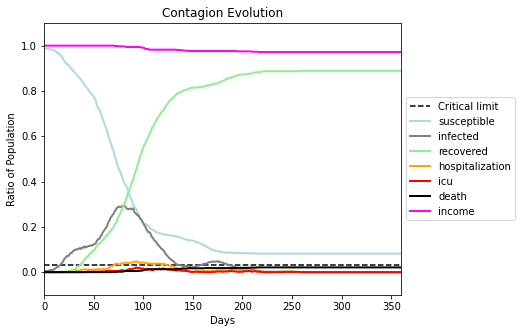

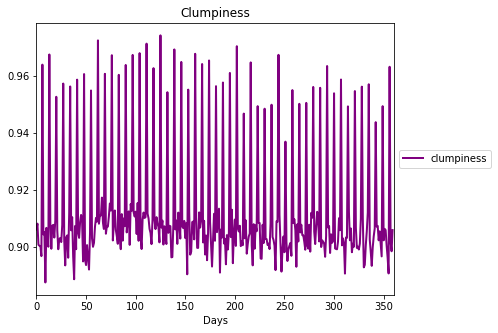

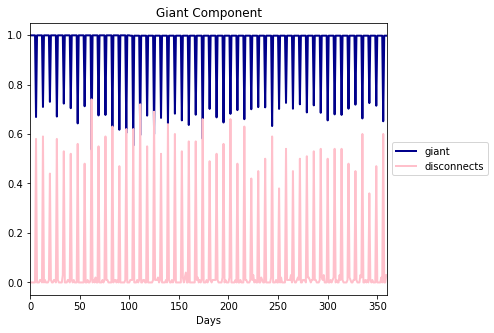

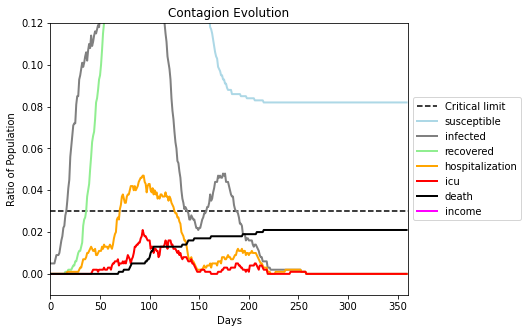

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[6260]
Average similarity between family members is 0.9769202264940736 at temperature -0.993
Average similarity between family and home is 0.9999182322287784 at temperature -1
Average similarity between students and their classroom is 0.563955480951175 at temperature -0.993
Average classroom occupancy is 12.708333333333334 and number classrooms is 24
Average similarity between workers is 0.9241509352664048 at temperature -0.993
Average office occupancy is 9.833333333333334 and number offices is 66
Average friend similarity for adults: 0.9703083748716156 for kids: 0.694114854064715
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

run with seed 6260:
avg restaurant similarity 0.6030715103644655
clumpiness 0.9002068585009763
maxlen 18
giant component 0.9903713892709766
disconnects 0.01
avg restaurant similarity 0.5448687221934809
clumpiness 0.893078986373104
maxlen 17
giant component 0.9903713892709766
disconnects 0.0
avg restaurant similarity 0.3596630132440848
clumpiness 0.9114747254379608
maxlen 20
giant component 0.9903713892709766
disconnects 0.03
avg restaurant similarity 0.465597468590222
clumpiness 0.906331409818252
maxlen 19
giant component 0.9903713892709766
disconnects 0.02
avg restaurant similarity 0.5256340947100339
clumpiness 0.8978587344028521
maxlen 17
giant component 0.9903713892709766
disconnects 0.01
avg restaurant similarity 0.43274134165543615
clumpiness 0.9022444181635358
maxlen 20
giant component 0.9903713892709766
disconnects 0.01
avg restaurant similarity 0.43934091653702556
clumpiness 0.9679073438429475
maxlen 30
giant component 0.7536023054755043
disconnects 0.57
avg restaurant similari

avg restaurant similarity 0.501384804696651
clumpiness 0.9026310660443788
maxlen 19
giant component 0.9903647625602202
disconnects 0.02
avg restaurant similarity 0.5655393935977433
clumpiness 0.8963769214961166
maxlen 21
giant component 0.9903647625602202
disconnects 0.01
avg restaurant similarity 0.40468612844312846
clumpiness 0.963708019392701
maxlen 23
giant component 0.6779538904899135
disconnects 0.59
avg restaurant similarity 0.27824282226230174
clumpiness 0.9038882435074387
maxlen 20
giant component 0.9903647625602202
disconnects 0.01
avg restaurant similarity 0.4043819465225714
clumpiness 0.90076797488717
maxlen 21
giant component 0.990358126721763
disconnects 0.0
avg restaurant similarity 0.5149153885520966
clumpiness 0.8999873182373184
maxlen 18
giant component 0.9903713892709766
disconnects 0.05
avg restaurant similarity 0.2593571204888763
clumpiness 0.900325943664179
maxlen 18
giant component 0.9903647625602202
disconnects 0.02
avg restaurant similarity 0.4134987120351278
c

avg restaurant similarity 0.6254943895910255
clumpiness 0.8884940296631474
maxlen 18
giant component 0.9889807162534435
disconnects 0.04
avg restaurant similarity 0.4809889668983549
clumpiness 0.9148197378816575
maxlen 19
giant component 0.9889958734525447
disconnects 0.04
avg restaurant similarity 0.5528999586119964
clumpiness 0.9055901337224868
maxlen 20
giant component 0.9889958734525447
disconnects 0.02
avg restaurant similarity 0.5401328628391147
clumpiness 0.901952842092548
maxlen 21
giant component 0.9889958734525447
disconnects 0.01
avg restaurant similarity 0.5166759016854868
clumpiness 0.9039274353097884
maxlen 21
giant component 0.9889958734525447
disconnects 0.01
avg restaurant similarity 0.4645813502189144
clumpiness 0.979134189150796
maxlen 35
giant component 0.6851585014409222
disconnects 0.61
avg restaurant similarity 0.40968445034917883
clumpiness 0.9073539969232695
maxlen 22
giant component 0.9889883000688231
disconnects 0.04
avg restaurant similarity 0.50556548262161

avg restaurant similarity 0.4852178864632843
clumpiness 0.902884839446759
maxlen 19
giant component 0.9889883000688231
disconnects 0.03
avg restaurant similarity 0.5174039187652774
clumpiness 0.9425591342180352
maxlen 26
giant component 0.7644092219020173
disconnects 0.41
avg restaurant similarity 0.5662227068427308
clumpiness 0.8967767387840917
maxlen 17
giant component 0.9889883000688231
disconnects 0.0
avg restaurant similarity 0.5751236604112407
clumpiness 0.9090814038902275
maxlen 22
giant component 0.9889883000688231
disconnects 0.04
avg restaurant similarity 0.5759710088410949
clumpiness 0.9063507995272702
maxlen 18
giant component 0.9889883000688231
disconnects 0.01
avg restaurant similarity 0.4901270747091209
clumpiness 0.9020247864880219
maxlen 18
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.5790252555684319
clumpiness 0.9007645467277821
maxlen 21
giant component 0.9889883000688231
disconnects 0.01
avg restaurant similarity 0.520382579430221

avg restaurant similarity 0.5661932163835247
clumpiness 0.8990753747886101
maxlen 18
giant component 0.9889883000688231
disconnects 0.01
avg restaurant similarity 0.43481321980735643
clumpiness 0.9042641818965349
maxlen 18
giant component 0.9889883000688231
disconnects 0.03
avg restaurant similarity 0.44602843036230777
clumpiness 0.8950057720057721
maxlen 15
giant component 0.9889883000688231
disconnects 0.01
avg restaurant similarity 0.5545076166509216
clumpiness 0.8988886550755747
maxlen 21
giant component 0.9889883000688231
disconnects 0.03
avg restaurant similarity 0.4405355310571092
clumpiness 0.9566229598046783
maxlen 29
giant component 0.6981268011527377
disconnects 0.47
avg restaurant similarity 0.5444634083862699
clumpiness 0.8937087269455691
maxlen 19
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.6573789315948763
clumpiness 0.89606248021844
maxlen 20
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.4891082993836

avg restaurant similarity 0.4523173810117039
clumpiness 0.9582471729709345
maxlen 28
giant component 0.7017291066282421
disconnects 0.56
avg restaurant similarity 0.6090815686090263
clumpiness 0.9080425742558096
maxlen 18
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.6216024994000987
clumpiness 0.9041032913165267
maxlen 17
giant component 0.9889883000688231
disconnects 0.0
avg restaurant similarity 0.5283785476238485
clumpiness 0.8942351008984136
maxlen 21
giant component 0.9889883000688231
disconnects 0.01
avg restaurant similarity 0.3852682938916363
clumpiness 0.9065327234255254
maxlen 19
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.41158553009020776
clumpiness 0.8971418689669465
maxlen 19
giant component 0.9889883000688231
disconnects 0.04
avg restaurant similarity 0.3934441653976047
clumpiness 0.8935079005961359
maxlen 17
giant component 0.9889883000688231
disconnects 0.02
avg restaurant similarity 0.5190419735833

using average of time series:
stats on susceptible:
data: [0.2119333333333333]
min:
0.2119333333333333
max:
0.2119333333333333
std:
0.0
mean:
0.2119333333333333
median:
0.2119333333333333
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.060050000000000006]
min:
0.060050000000000006
max:
0.060050000000000006
std:
0.0
mean:
0.060050000000000006
median:
0.060050000000000006
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.7009444444444446]
min:
0.7009444444444446
max:
0.7009444444444446
std:
0.0
mean:
0.7009444444444446
median:
0.7009444444444446
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.010400000000000001]
min:
0.010400000000000001
max:
0.010400000000000001
std:
0.0
mean:
0.010400000000000001
median:
0.010400000000000001
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats o

(<function dict.items>, <function dict.items>, <function dict.items>)

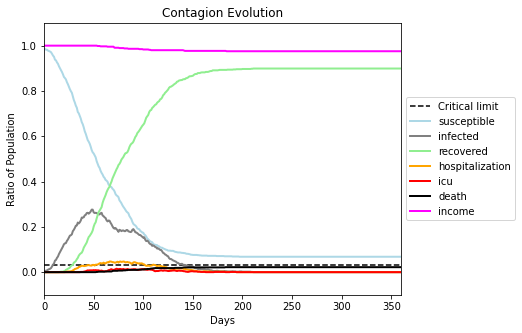

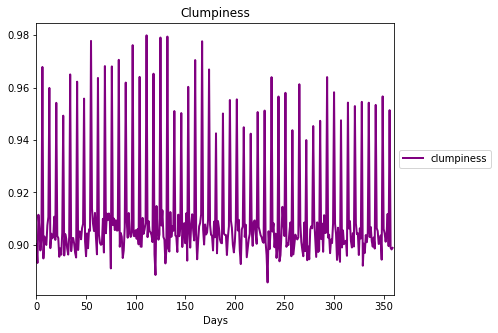

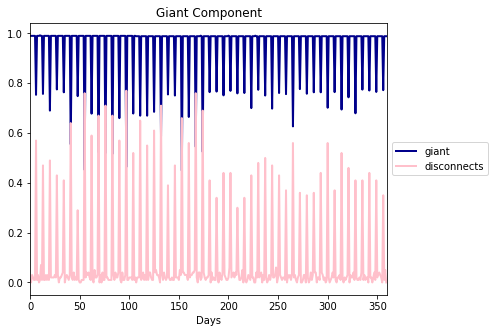

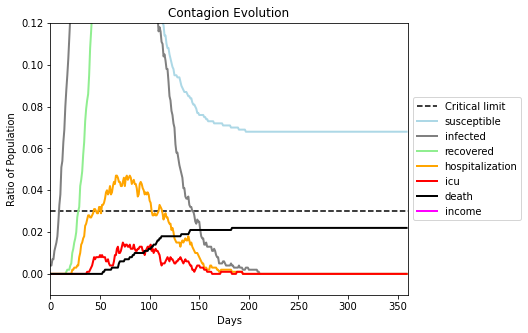

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[9825]
Average similarity between family members is 0.9814962667634585 at temperature -0.992
Average similarity between family and home is 0.9998963315513372 at temperature -1
Average similarity between students and their classroom is 0.4825962964127646 at temperature -0.992
Average classroom occupancy is 11.875 and number classrooms is 24
Average similarity between workers is 0.9000141134242837 at temperature -0.992
Average office occupancy is 10.169230769230769 and number offices is 65
Average friend similarity for adults: 0.9561616175070383 for kids: 0.6407975999503397
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 peo

avg restaurant similarity 0.2960622997881626
clumpiness 0.9040800141550915
maxlen 20
giant component 0.9951856946354883
disconnects 0.02
avg restaurant similarity 0.17380830061123423
clumpiness 0.9065500288325367
maxlen 19
giant component 0.9951856946354883
disconnects 0.01
avg restaurant similarity 0.4340551717490559
clumpiness 0.9124029804045284
maxlen 21
giant component 0.9951856946354883
disconnects 0.02
avg restaurant similarity 0.4541225429567508
clumpiness 0.9032762458559673
maxlen 19
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.30259898069421126
clumpiness 0.9013842648579491
maxlen 19
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.1960479265860032
clumpiness 0.9051089919282644
maxlen 22
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.11603890781399119
clumpiness 0.9539253280528376
maxlen 29
giant component 0.6558675305975522
disconnects 0.47
avg restaurant similarity 0.2436057414382

avg restaurant similarity 0.381752692083954
clumpiness 0.9048166623108574
maxlen 24
giant component 0.9951856946354883
disconnects 0.01
avg restaurant similarity 0.34014996332336317
clumpiness 0.8952767618518394
maxlen 19
giant component 0.9951856946354883
disconnects 0.01
avg restaurant similarity 0.12307834675216774
clumpiness 0.9737361521503229
maxlen 28
giant component 0.6515478761699064
disconnects 0.62
avg restaurant similarity 0.32954073310911763
clumpiness 0.9021168072123955
maxlen 22
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.23894954469829044
clumpiness 0.9031357362108137
maxlen 20
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.25147720532979395
clumpiness 0.904942507655743
maxlen 20
giant component 0.9951856946354883
disconnects 0.0
avg restaurant similarity 0.2754477331460457
clumpiness 0.90066347704583
maxlen 20
giant component 0.9951856946354883
disconnects 0.01
avg restaurant similarity 0.181069975628426

avg restaurant similarity 0.4085182569849295
clumpiness 0.9036131148263502
maxlen 20
giant component 0.9938101788170564
disconnects 0.02
avg restaurant similarity 0.1755685341470391
clumpiness 0.9006547610885847
maxlen 18
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.19065837079907733
clumpiness 0.9050409894543022
maxlen 22
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.3399755369442055
clumpiness 0.9031694108694883
maxlen 21
giant component 0.9938101788170564
disconnects 0.02
avg restaurant similarity 0.30467868249883057
clumpiness 0.9049803689172885
maxlen 19
giant component 0.9938101788170564
disconnects 0.04
avg restaurant similarity 0.2738261256906956
clumpiness 0.9638714074023671
maxlen 19
giant component 0.5305975521958244
disconnects 0.71
avg restaurant similarity 0.2877317974312975
clumpiness 0.9046563046946174
maxlen 20
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.37738609808215

avg restaurant similarity 0.3297730039323505
clumpiness 0.9042019592035072
maxlen 21
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.3860246736371128
clumpiness 0.9700490449930113
maxlen 26
giant component 0.5457163426925846
disconnects 0.66
avg restaurant similarity 0.3460219694762242
clumpiness 0.9033451183319605
maxlen 20
giant component 0.9938101788170564
disconnects 0.02
avg restaurant similarity 0.20812857833784754
clumpiness 0.899448003793592
maxlen 22
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.40362921328940676
clumpiness 0.9044751294457177
maxlen 18
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.3075208318344252
clumpiness 0.9022287414597787
maxlen 21
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.40904581221017755
clumpiness 0.9067097795994855
maxlen 18
giant component 0.9938101788170564
disconnects 0.03
avg restaurant similarity 0.58612945633

avg restaurant similarity 0.27315826680658634
clumpiness 0.9040512765528246
maxlen 19
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.2961360518310296
clumpiness 0.8931956450412333
maxlen 21
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.24726049637873726
clumpiness 0.9064055107689009
maxlen 19
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.22976062780618745
clumpiness 0.9050158216396607
maxlen 20
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.15882317107261942
clumpiness 0.9747669430535563
maxlen 27
giant component 0.5349172066234701
disconnects 0.69
avg restaurant similarity 0.2507876502503223
clumpiness 0.9098925741441222
maxlen 19
giant component 0.9938101788170564
disconnects 0.02
avg restaurant similarity 0.3375848240850039
clumpiness 0.9049426341632225
maxlen 20
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.36779103103

avg restaurant similarity 0.2302676548858687
clumpiness 0.9656942652675692
maxlen 25
giant component 0.6623470122390209
disconnects 0.51
avg restaurant similarity 0.20526107855569203
clumpiness 0.8939845320228448
maxlen 19
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.2500472006973666
clumpiness 0.9002994898697719
maxlen 23
giant component 0.9938101788170564
disconnects 0.02
avg restaurant similarity 0.28317121733098155
clumpiness 0.9073222310175131
maxlen 23
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.3590516986147625
clumpiness 0.9081359233301959
maxlen 22
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.2773138158434786
clumpiness 0.9085982922306453
maxlen 20
giant component 0.9938101788170564
disconnects 0.01
avg restaurant similarity 0.1619927108320969
clumpiness 0.9036404902287256
maxlen 18
giant component 0.9938101788170564
disconnects 0.0
avg restaurant similarity 0.08398600600793

using average of time series:
stats on susceptible:
data: [0.30366111111111116]
min:
0.30366111111111116
max:
0.30366111111111116
std:
0.0
mean:
0.30366111111111116
median:
0.30366111111111116
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.05963888888888889]
min:
0.05963888888888889
max:
0.05963888888888889
std:
0.0
mean:
0.05963888888888889
median:
0.05963888888888889
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.6168666666666667]
min:
0.6168666666666667
max:
0.6168666666666667
std:
0.0
mean:
0.6168666666666667
median:
0.6168666666666667
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.009880555555555557]
min:
0.009880555555555557
max:
0.009880555555555557
std:
0.0
mean:
0.009880555555555557
median:
0.009880555555555557
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats o

(<function dict.items>, <function dict.items>, <function dict.items>)

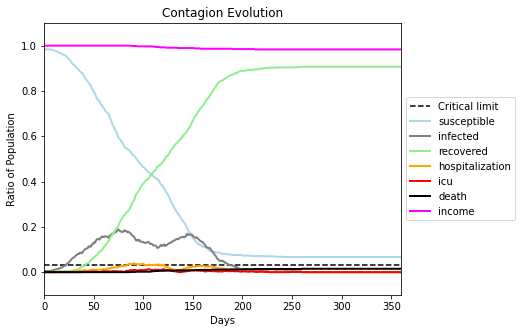

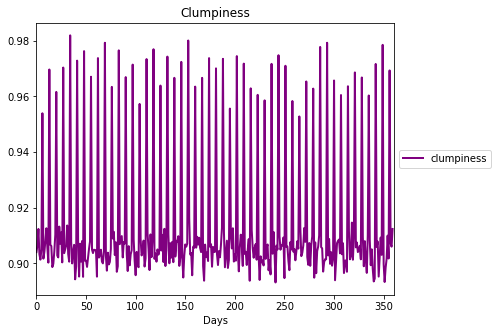

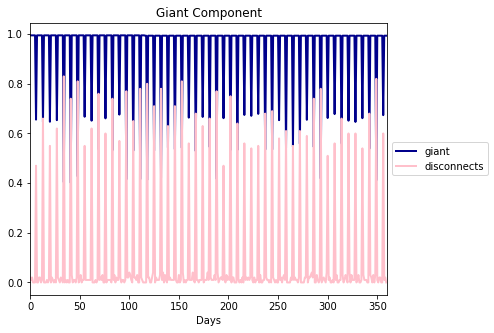

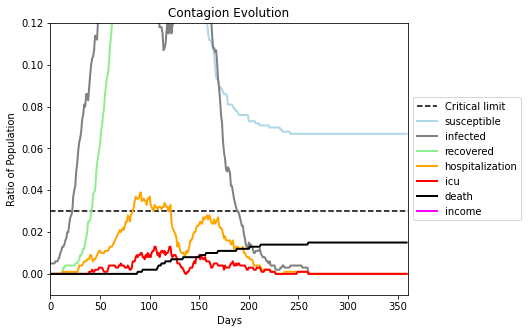

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank )


Save these seeds if you want to rerun a scenario
[5057]
Average similarity between family members is 0.9799099777469269 at temperature -0.991
Average similarity between family and home is 0.9998895278989903 at temperature -1
Average similarity between students and their classroom is 0.4389255579556723 at temperature -0.991
Average classroom occupancy is 12.291666666666666 and number classrooms is 24
Average similarity between workers is 0.9016550804743875 at temperature -0.991
Average office occupancy is 9.833333333333334 and number offices is 66
Average friend similarity for adults: 0.9484839635197038 for kids: 0.6232116781022015
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tot

avg restaurant similarity 0.3283172651201398
clumpiness 0.9001726159976935
maxlen 19
giant component 0.9965397923875432
disconnects 0.01
avg restaurant similarity 0.17715023428534937
clumpiness 0.9014654667228198
maxlen 20
giant component 0.9965397923875432
disconnects 0.01
avg restaurant similarity 0.33968870991728006
clumpiness 0.8935617078999433
maxlen 18
giant component 0.9965397923875432
disconnects 0.01
avg restaurant similarity 0.20406621736306643
clumpiness 0.8999139857390632
maxlen 19
giant component 0.9965397923875432
disconnects 0.01
avg restaurant similarity 0.37484125295447235
clumpiness 0.9015295050237001
maxlen 21
giant component 0.9965397923875432
disconnects 0.0
avg restaurant similarity 0.3726644871975424
clumpiness 0.8973663297486828
maxlen 18
giant component 0.9965397923875432
disconnects 0.0
avg restaurant similarity 0.30722615111958146
clumpiness 0.9499183910064749
maxlen 23
giant component 0.6860043509789703
disconnects 0.53
avg restaurant similarity 0.5673737281

avg restaurant similarity 0.38204325883320994
clumpiness 0.9076006201830505
maxlen 20
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.34931225062230753
clumpiness 0.9048848308554192
maxlen 21
giant component 0.9951557093425606
disconnects 0.0
avg restaurant similarity 0.3870173789135646
clumpiness 0.9639612655146711
maxlen 22
giant component 0.7026831036983321
disconnects 0.54
avg restaurant similarity 0.3027566826865152
clumpiness 0.8998014038764813
maxlen 21
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.3615727425905692
clumpiness 0.9024832406155936
maxlen 20
giant component 0.9951557093425606
disconnects 0.0
avg restaurant similarity 0.48353848639275576
clumpiness 0.8949534740285514
maxlen 20
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.3732668166990747
clumpiness 0.895379982160942
maxlen 21
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.4242657888813

avg restaurant similarity 0.544815415492874
clumpiness 0.906319544232857
maxlen 19
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.4352632818993611
clumpiness 0.8896131678778738
maxlen 18
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.2835237421505157
clumpiness 0.9071647078411784
maxlen 20
giant component 0.9951557093425606
disconnects 0.01
avg restaurant similarity 0.3611876285204415
clumpiness 0.896776137476215
maxlen 19
giant component 0.9951557093425606
disconnects 0.0
avg restaurant similarity 0.33292848031830846
clumpiness 0.8979628998452529
maxlen 18
giant component 0.9951557093425606
disconnects 0.0
avg restaurant similarity 0.2385633490755698
clumpiness 0.9526341153555618
maxlen 23
giant component 0.7084844089920233
disconnects 0.48
avg restaurant similarity 0.31291324730517506
clumpiness 0.8996541385600983
maxlen 20
giant component 0.9951557093425606
disconnects 0.0
avg restaurant similarity 0.3574752214383217


avg restaurant similarity 0.3228324507275383
clumpiness 0.9063881227132001
maxlen 22
giant component 0.9930795847750865
disconnects 0.0
avg restaurant similarity 0.39991723211161734
clumpiness 0.9517214967844259
maxlen 23
giant component 0.6997824510514866
disconnects 0.57
avg restaurant similarity 0.26271408222316583
clumpiness 0.8999287430405852
maxlen 19
giant component 0.9930795847750865
disconnects 0.02
avg restaurant similarity 0.2974983173034345
clumpiness 0.9050010894248511
maxlen 19
giant component 0.9930795847750865
disconnects 0.01
avg restaurant similarity 0.34994010521974567
clumpiness 0.8923316242580949
maxlen 18
giant component 0.9930795847750865
disconnects 0.01
avg restaurant similarity 0.3016455093648022
clumpiness 0.9054870978694509
maxlen 20
giant component 0.9930795847750865
disconnects 0.02
avg restaurant similarity 0.3372797205271713
clumpiness 0.9056200662083016
maxlen 24
giant component 0.9930795847750865
disconnects 0.01
avg restaurant similarity 0.29283919371

avg restaurant similarity 0.38883720015183276
clumpiness 0.9047705140147091
maxlen 20
giant component 0.9910034602076124
disconnects 0.01
avg restaurant similarity 0.33547397523342865
clumpiness 0.8955212534713309
maxlen 21
giant component 0.9910034602076124
disconnects 0.01
avg restaurant similarity 0.30921487404491194
clumpiness 0.8936573802014979
maxlen 18
giant component 0.9910034602076124
disconnects 0.03
avg restaurant similarity 0.30757004055614606
clumpiness 0.9125028845853149
maxlen 20
giant component 0.9910034602076124
disconnects 0.03
avg restaurant similarity 0.2627279824707249
clumpiness 0.9587292765495372
maxlen 37
giant component 0.69108049311095
disconnects 0.48
avg restaurant similarity 0.41551778386153704
clumpiness 0.8953220678530277
maxlen 19
giant component 0.9910034602076124
disconnects 0.03
avg restaurant similarity 0.2865897870502836
clumpiness 0.9068255449830528
maxlen 19
giant component 0.9910034602076124
disconnects 0.0
avg restaurant similarity 0.36686946644

avg restaurant similarity 0.3723220947353019
clumpiness 0.9517250176392659
maxlen 27
giant component 0.7019579405366208
disconnects 0.44
avg restaurant similarity 0.2818448080687587
clumpiness 0.8999558431764315
maxlen 21
giant component 0.9910034602076124
disconnects 0.01
avg restaurant similarity 0.21661032110469505
clumpiness 0.9015934272126223
maxlen 20
giant component 0.9910034602076124
disconnects 0.0
avg restaurant similarity 0.4598260723527319
clumpiness 0.9046278290852594
maxlen 19
giant component 0.9910034602076124
disconnects 0.02
avg restaurant similarity 0.37287376307485176
clumpiness 0.9051255946066319
maxlen 20
giant component 0.9910034602076124
disconnects 0.01
avg restaurant similarity 0.26494142860086306
clumpiness 0.8987682621815749
maxlen 20
giant component 0.9910034602076124
disconnects 0.03
avg restaurant similarity 0.293507649340414
clumpiness 0.9102726287300591
maxlen 21
giant component 0.9910034602076124
disconnects 0.06
avg restaurant similarity 0.428425730914

using average of time series:
stats on susceptible:
data: [0.5101972222222222]
min:
0.5101972222222222
max:
0.5101972222222222
std:
0.0
mean:
0.5101972222222222
median:
0.5101972222222222
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.04573611111111111]
min:
0.04573611111111111
max:
0.04573611111111111
std:
0.0
mean:
0.04573611111111111
median:
0.04573611111111111
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.43077777777777776]
min:
0.43077777777777776
max:
0.43077777777777776
std:
0.0
mean:
0.43077777777777776
median:
0.43077777777777776
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.007694444444444446]
min:
0.007694444444444446
max:
0.007694444444444446
std:
0.0
mean:
0.007694444444444446
median:
0.007694444444444446
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats o

(<function dict.items>, <function dict.items>, <function dict.items>)

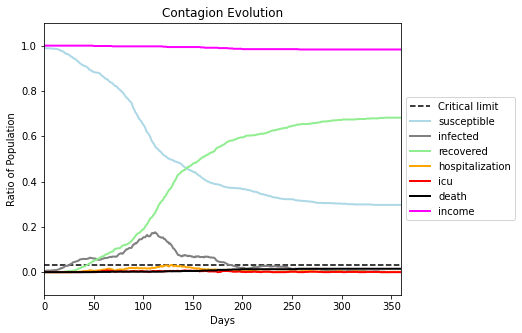

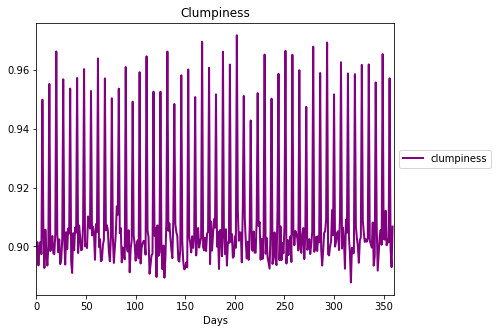

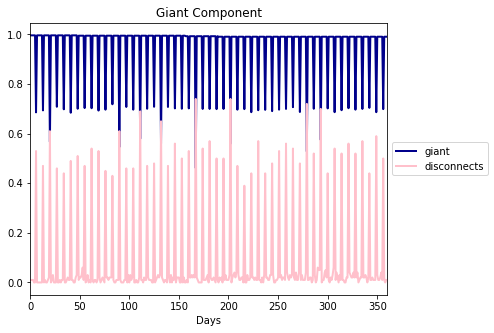

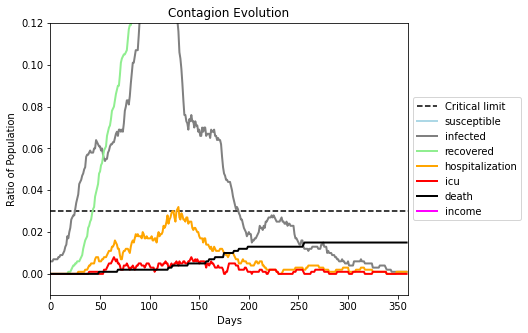

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7810]
Average similarity between family members is 0.9778364091519193 at temperature -0.99
Average similarity between family and home is 0.9999052391878558 at temperature -1
Average similarity between students and their classroom is 0.41156906652948266 at temperature -0.99
Average classroom occupancy is 12.791666666666666 and number classrooms is 24
Average similarity between workers is 0.8945128712724765 at temperature -0.99
Average office occupancy is 9.469696969696969 and number offices is 66
Average friend similarity for adults: 0.9498539109602887 for kids: 0.6515793160322058
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

avg restaurant similarity 0.476285918321793
clumpiness 0.8936531385281385
maxlen 16
giant component 0.9902166317260657
disconnects 0.02
avg restaurant similarity 0.47429546369800846
clumpiness 0.8886480757804287
maxlen 17
giant component 0.9902166317260657
disconnects 0.02
avg restaurant similarity 0.5184218000858357
clumpiness 0.8881912866545221
maxlen 18
giant component 0.9902166317260657
disconnects 0.01
avg restaurant similarity 0.5389690123950083
clumpiness 0.8883480547230548
maxlen 16
giant component 0.9902166317260657
disconnects 0.01
avg restaurant similarity 0.44908926362644436
clumpiness 0.8923756243756243
maxlen 14
giant component 0.9902166317260657
disconnects 0.04
avg restaurant similarity 0.3894439575421557
clumpiness 0.8957671552303906
maxlen 17
giant component 0.9902166317260657
disconnects 0.0
avg restaurant similarity 0.38214618480569146
clumpiness 0.9368054426802913
maxlen 23
giant component 0.8073260073260073
disconnects 0.38
avg restaurant similarity 0.355455193333

avg restaurant similarity 0.5316433453938696
clumpiness 0.894323783242901
maxlen 18
giant component 0.9902166317260657
disconnects 0.02
avg restaurant similarity 0.3567963326810711
clumpiness 0.8950019147519148
maxlen 16
giant component 0.9902097902097902
disconnects 0.0
avg restaurant similarity 0.3982859149000015
clumpiness 0.9523544560960195
maxlen 26
giant component 0.7696258253851798
disconnects 0.45
avg restaurant similarity 0.422353704661498
clumpiness 0.8954586257395856
maxlen 21
giant component 0.9901960784313726
disconnects 0.01
avg restaurant similarity 0.6651422988703455
clumpiness 0.8986949033508631
maxlen 19
giant component 0.9902029391182645
disconnects 0.02
avg restaurant similarity 0.5670421316056047
clumpiness 0.8856772075963253
maxlen 18
giant component 0.9902029391182645
disconnects 0.0
avg restaurant similarity 0.49636377469858595
clumpiness 0.8996595781669312
maxlen 17
giant component 0.9902029391182645
disconnects 0.01
avg restaurant similarity 0.6089801162960531

clumpiness 0.8944502262443439
maxlen 21
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.3957404587913176
clumpiness 0.8850389985831163
maxlen 17
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.29251193233381545
clumpiness 0.8909047341547343
maxlen 15
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.3499999396391118
clumpiness 0.8956644240262661
maxlen 19
giant component 0.9888190076869322
disconnects 0.02
avg restaurant similarity 0.39166091283453097
clumpiness 0.8951335249717604
maxlen 17
giant component 0.9888111888111888
disconnects 0.02
avg restaurant similarity 0.49602122334806964
clumpiness 0.9416695418874211
maxlen 26
giant component 0.7875457875457875
disconnects 0.37
avg restaurant similarity 0.5039411529325618
clumpiness 0.8952711455211456
maxlen 16
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.3830559591176756
clumpiness 0.885432622932623
maxlen 15

clumpiness 0.8983154761904762
maxlen 18
giant component 0.9888190076869322
disconnects 0.04
avg restaurant similarity 0.5105721059462534
clumpiness 0.9455388912772814
maxlen 22
giant component 0.7985347985347986
disconnects 0.35
avg restaurant similarity 0.5216300187103875
clumpiness 0.893104367854368
maxlen 16
giant component 0.9888190076869322
disconnects 0.0
avg restaurant similarity 0.5639341263583691
clumpiness 0.8928145082042142
maxlen 17
giant component 0.9888190076869322
disconnects 0.02
avg restaurant similarity 0.43370216194206723
clumpiness 0.8916989179121533
maxlen 18
giant component 0.9888190076869322
disconnects 0.04
avg restaurant similarity 0.5428546467230839
clumpiness 0.900409318622554
maxlen 17
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.5147371271423757
clumpiness 0.8934204047586402
maxlen 18
giant component 0.9888190076869322
disconnects 0.03
avg restaurant similarity 0.5285272254701817
clumpiness 0.8900296329487506
maxlen 20
gia

clumpiness 0.8852731990231991
maxlen 15
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.5286560355108594
clumpiness 0.892099665255625
maxlen 19
giant component 0.9888190076869322
disconnects 0.0
avg restaurant similarity 0.47239077499391313
clumpiness 0.8931544444117975
maxlen 17
giant component 0.9888190076869322
disconnects 0.03
avg restaurant similarity 0.45681411781519315
clumpiness 0.8914046647796648
maxlen 16
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.46330785959446474
clumpiness 0.9438662757091549
maxlen 19
giant component 0.7860805860805861
disconnects 0.4
avg restaurant similarity 0.3585430801682058
clumpiness 0.890813172938173
maxlen 16
giant component 0.9888190076869322
disconnects 0.02
avg restaurant similarity 0.5174179383190791
clumpiness 0.8899353563103564
maxlen 16
giant component 0.9888190076869322
disconnects 0.02
avg restaurant similarity 0.47021175121898123
clumpiness 0.8989419110301464
maxlen 17
g

clumpiness 0.9461395134512816
maxlen 23
giant component 0.7860805860805861
disconnects 0.43
avg restaurant similarity 0.5100078402573672
clumpiness 0.8972657122289476
maxlen 17
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.5854350594580313
clumpiness 0.8981807647117246
maxlen 19
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.3763795409536386
clumpiness 0.8908535035226213
maxlen 17
giant component 0.9888190076869322
disconnects 0.0
avg restaurant similarity 0.616328092931564
clumpiness 0.8982383131574309
maxlen 17
giant component 0.9888190076869322
disconnects 0.0
avg restaurant similarity 0.5039024281992919
clumpiness 0.8975630341880342
maxlen 18
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.4083591082280643
clumpiness 0.8990296386619916
maxlen 17
giant component 0.9888190076869322
disconnects 0.01
avg restaurant similarity 0.4128628571431879
clumpiness 0.9293925139617865
maxlen 21
gian

(<function dict.items>, <function dict.items>, <function dict.items>)

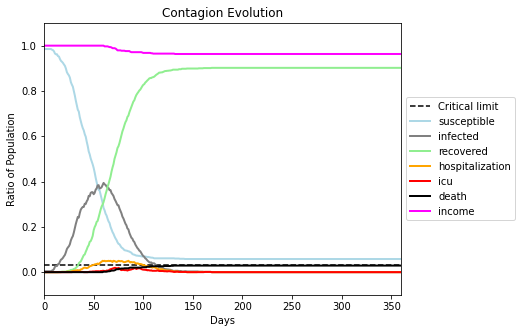

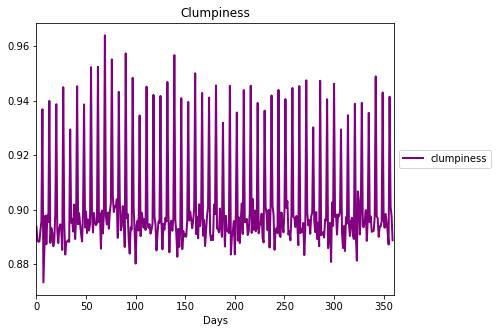

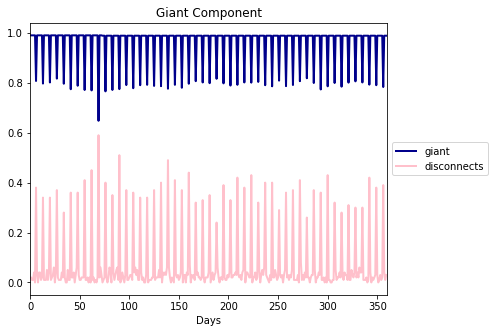

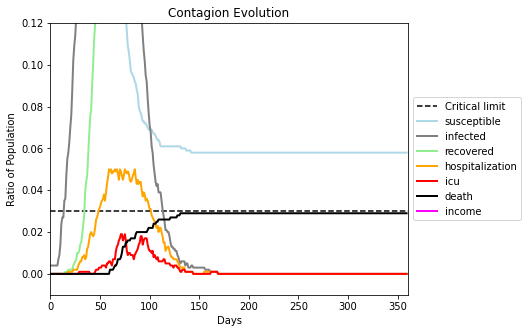

In [15]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[684]
Average similarity between family members is 0.9635372202836703 at temperature -0.98
Average similarity between family and home is 0.9999025781806412 at temperature -1
Average similarity between students and their classroom is 0.4186798128523184 at temperature -0.98
Average classroom occupancy is 11.083333333333334 and number classrooms is 24
Average similarity between workers is 0.7616127118865105 at temperature -0.98
Average office occupancy is 10.424242424242424 and number offices is 66
Average friend similarity for adults: 0.8747966722590527 for kids: 0.6144005047324962
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total 

avg restaurant similarity 0.2558285708026234
clumpiness 0.8864482461982464
maxlen 15
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.46141186974899245
clumpiness 0.8867533675474852
maxlen 17
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.321967033544591
clumpiness 0.8865210483960485
maxlen 16
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.4894684885054934
clumpiness 0.8858224275724276
maxlen 16
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.41014062407854046
clumpiness 0.8890631966073144
maxlen 17
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.23279509808335352
clumpiness 0.8884319112260289
maxlen 17
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.379319720356972
clumpiness 0.9564769137530781
maxlen 23
giant component 0.6966452533904354
disconnects 0.53
avg restaurant similarity 0.331701029576496
cl

avg restaurant similarity 0.28802184159695365
clumpiness 0.8953918956860134
maxlen 18
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.3622204856033917
clumpiness 0.8825511710511711
maxlen 15
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.31218328327116796
clumpiness 0.9573488832868123
maxlen 23
giant component 0.6673804425410421
disconnects 0.56
avg restaurant similarity 0.13763977467324628
clumpiness 0.8843462232212232
maxlen 16
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.23184673613909404
clumpiness 0.8875711094461096
maxlen 16
giant component 0.9986366734832992
disconnects 0.0
avg restaurant similarity 0.1530590073402379
clumpiness 0.8953242035742037
maxlen 16
giant component 0.9986348122866894
disconnects 0.0
avg restaurant similarity 0.22242510541923655
clumpiness 0.8965970793911971
maxlen 17
giant component 0.9986357435197817
disconnects 0.0
avg restaurant similarity 0.33074296352898

clumpiness 0.8916490037740038
maxlen 16
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.1392008879229029
clumpiness 0.8956171467421468
maxlen 18
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.49226469142664175
clumpiness 0.8871727855477856
maxlen 18
giant component 0.9945429740791268
disconnects 0.0
avg restaurant similarity 0.20044581162308236
clumpiness 0.8942227829360183
maxlen 18
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.30482053834108735
clumpiness 0.8848187368187368
maxlen 15
giant component 0.994546693933197
disconnects 0.02
avg restaurant similarity 0.24926512326605213
clumpiness 0.9644917393277368
maxlen 30
giant component 0.6533238027162259
disconnects 0.6
avg restaurant similarity 0.23817343709411234
clumpiness 0.8950004856254857
maxlen 16
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.3699268105971308
clumpiness 0.8947455420396597
maxlen 17
gian

avg restaurant similarity 0.3332223006979285
clumpiness 0.9542394570513766
maxlen 22
giant component 0.6745182012847966
disconnects 0.48
avg restaurant similarity 0.08360003432539859
clumpiness 0.8973276502908856
maxlen 17
giant component 0.994546693933197
disconnects 0.02
avg restaurant similarity 0.2225364601521304
clumpiness 0.8915560550560551
maxlen 14
giant component 0.994546693933197
disconnects 0.03
avg restaurant similarity 0.24599056353730067
clumpiness 0.8902906738084757
maxlen 19
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.34266474184879053
clumpiness 0.8830078532578532
maxlen 15
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.2884627062419199
clumpiness 0.8955378885820063
maxlen 18
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.23719011972634557
clumpiness 0.8918227744477745
maxlen 16
giant component 0.994546693933197
disconnects 0.02
avg restaurant similarity 0.37403834764347305

clumpiness 0.8901753801753802
maxlen 15
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.21070752016757593
clumpiness 0.8935632937324114
maxlen 17
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.2607003717775838
clumpiness 0.8942109140859141
maxlen 18
giant component 0.994546693933197
disconnects 0.02
avg restaurant similarity 0.2983703354448632
clumpiness 0.961981113200002
maxlen 23
giant component 0.6357142857142857
disconnects 0.56
avg restaurant similarity 0.19337528171527543
clumpiness 0.8869346486846488
maxlen 14
giant component 0.994546693933197
disconnects 0.0
avg restaurant similarity 0.37899200328526855
clumpiness 0.8912119645060822
maxlen 17
giant component 0.994546693933197
disconnects 0.03
avg restaurant similarity 0.21336315700678876
clumpiness 0.88986141228053
maxlen 17
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.40423613282933724
clumpiness 0.890323182536418
maxlen 17
giant com

avg restaurant similarity 0.3546364598998878
clumpiness 0.8860599400599402
maxlen 14
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.3825288861850858
clumpiness 0.887618117993118
maxlen 16
giant component 0.994546693933197
disconnects 0.01
avg restaurant similarity 0.3755681901290391
clumpiness 0.8933879315129316
maxlen 18
giant component 0.9945429740791268
disconnects 0.01
avg restaurant similarity 0.2781231887717512
clumpiness 0.893544413919414
maxlen 16
giant component 0.994546693933197
disconnects 0.03
avg restaurant similarity 0.11903423743753103
clumpiness 0.8853236861178038
maxlen 18
giant component 0.994546693933197
disconnects 0.03
avg restaurant similarity 0.3265903610681052
clumpiness 0.9666645992895992
maxlen 18
giant component 0.6542857142857142
disconnects 0.64
avg restaurant similarity 0.31367574194362796
clumpiness 0.8902336511527689
maxlen 17
giant component 0.994546693933197
disconnects 0.02
avg restaurant similarity 0.3330207583238746
c

(<function dict.items>, <function dict.items>, <function dict.items>)

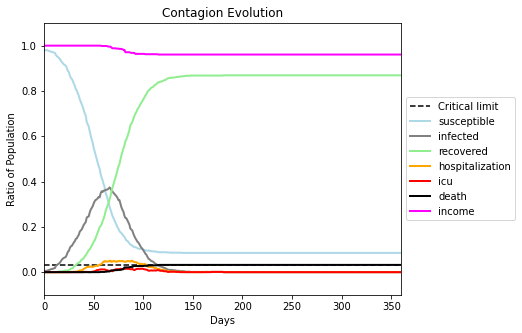

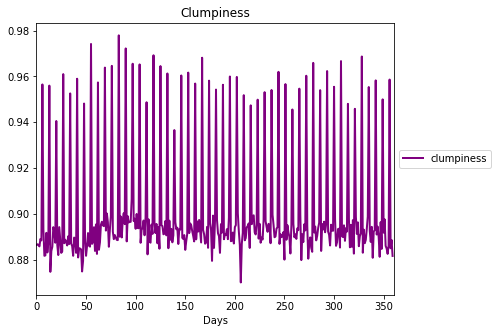

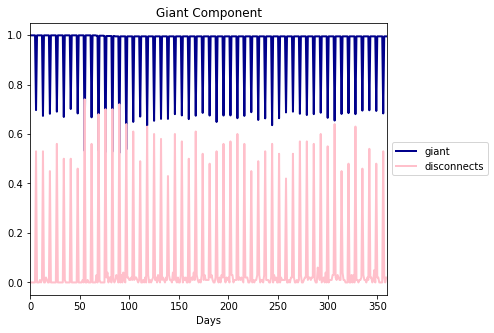

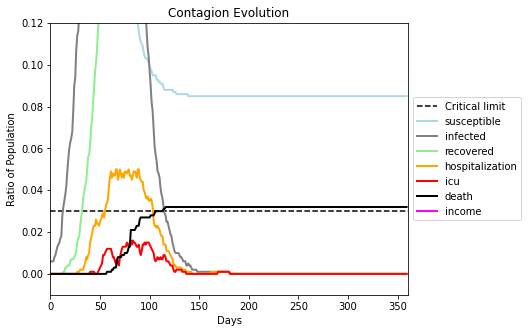

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[4599]
Average similarity between family members is 0.9427225036616292 at temperature -0.97
Average similarity between family and home is 0.9999025696018811 at temperature -1
Average similarity between students and their classroom is 0.4257496954624572 at temperature -0.97
Average classroom occupancy is 11.833333333333334 and number classrooms is 24
Average similarity between workers is 0.6597573452573671 at temperature -0.97
Average office occupancy is 9.954545454545455 and number offices is 66
Average friend similarity for adults: 0.8056840415236953 for kids: 0.5973793892180694
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 5 people.
Total 

avg restaurant similarity 0.21085305029898777
clumpiness 0.8835398351648353
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15186558760805907
clumpiness 0.8810013181263181
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.35700572848825335
clumpiness 0.891792735042735
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2912353623506454
clumpiness 0.8917525807525808
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.299546621739832
clumpiness 0.8900403207903209
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.20543862794538897
clumpiness 0.8870031635031634
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2845822166992866
clumpiness 0.9609328002578776
maxlen 26
giant component 0.7241877256317689
disconnects 0.51
avg restaurant similarity 0.23579836809267748
clumpiness 0.8852946497946499
maxlen 14
giant component 1.0
disconnects 0.0
avg restauran

clumpiness 0.8807763347763349
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2490977675386233
clumpiness 0.8846266511266512
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1359395157819815
clumpiness 0.8890841658341659
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3202832646086611
clumpiness 0.9581956136463122
maxlen 39
giant component 0.7415162454873646
disconnects 0.42
avg restaurant similarity 0.2278687442822313
clumpiness 0.88492340992341
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5122296840738236
clumpiness 0.8839051504051505
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.08018405583027828
clumpiness 0.8825499500499501
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.17764078780291367
clumpiness 0.8867598790098791
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2184000984019932
clumpiness 0.885

avg restaurant similarity 0.29717382852218727
clumpiness 0.8889520757020757
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22881604480575837
clumpiness 0.8845409867909868
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3139003930388997
clumpiness 0.8831223914973916
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22810367192036288
clumpiness 0.8916723831723832
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.26109014214008236
clumpiness 0.8882014374514375
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2932750827297259
clumpiness 0.8910110445110446
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3470710759208797
clumpiness 0.9572901923068332
maxlen 22
giant component 0.7126353790613719
disconnects 0.48
avg restaurant similarity 0.27733611585621304
clumpiness 0.890384670884671
maxlen 15
giant component 1.0
disconnects 0.0
avg restaura

clumpiness 0.8889097944539122
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15818146455788518
clumpiness 0.8879150294150295
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.26593319761739864
clumpiness 0.8847365967365968
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.23993297437438285
clumpiness 0.9561448796021585
maxlen 23
giant component 0.7249097472924187
disconnects 0.51
avg restaurant similarity 0.22700082510445943
clumpiness 0.8921212398712399
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22494797023752805
clumpiness 0.8887523865023865
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.30285768839078714
clumpiness 0.8834290986790988
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2285236712415834
clumpiness 0.8896273726273727
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1368028022428835
clumpiness

avg restaurant similarity 0.2517617548490133
clumpiness 0.8890631780500202
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.33637020739920387
clumpiness 0.8930922965922966
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.15997759868671685
clumpiness 0.8898922882672884
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.22771524125516396
clumpiness 0.8943142135642136
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.24987654349812438
clumpiness 0.8794146686646688
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.34157989942137595
clumpiness 0.8892617758058934
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2637785041305461
clumpiness 0.9530215600682352
maxlen 23
giant component 0.7342960288808664
disconnects 0.41
avg restaurant similarity 0.32123745017543204
clumpiness 0.8919552767493945
maxlen 18
giant component 1.0
disconnects 0.0
avg restau

clumpiness 0.8909636664505086
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.31343548629716594
clumpiness 0.8845990675990677
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.25085887871140716
clumpiness 0.8938316128316128
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.33181315779277715
clumpiness 0.9560080454890827
maxlen 19
giant component 0.6267148014440433
disconnects 0.57
avg restaurant similarity 0.28172071434411444
clumpiness 0.8809379231879233
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.24675467618741243
clumpiness 0.8946982184482185
maxlen 15
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3494317841972487
clumpiness 0.888302294927295
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2853378668460069
clumpiness 0.8894255287196464
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3726925309434573
clumpiness 0

(<function dict.items>, <function dict.items>, <function dict.items>)

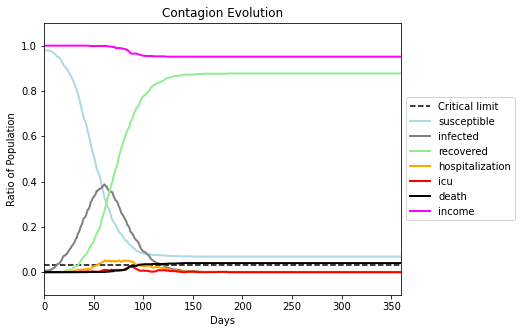

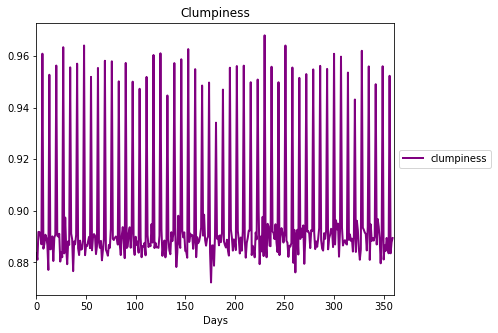

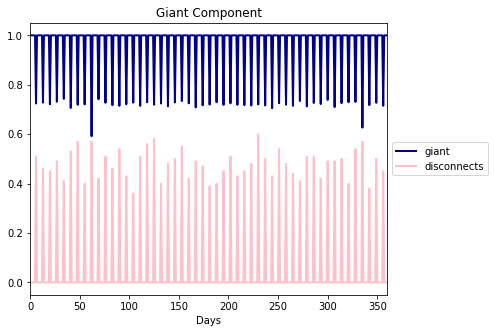

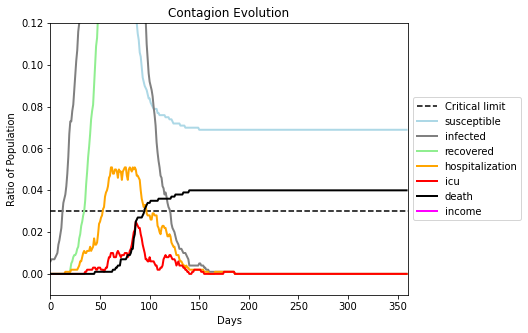

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7209]
Average similarity between family members is 0.030185524932503576 at temperature 1
Average similarity between family and home is 0.9998911370998311 at temperature -1
Average similarity between students and their classroom is 0.05365787301415742 at temperature 1
Average classroom occupancy is 10.958333333333334 and number classrooms is 24
Average similarity between workers is 0.0424011135299712 at temperature 1
Average office occupancy is 10.227272727272727 and number offices is 66
Average friend similarity for adults: 0.08479552039505224 for kids: 0.082073604482292
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 peo

run with seed 7209:
avg restaurant similarity 0.10271639872862633
clumpiness 0.8808194305694307
maxlen 14
giant component 0.9952120383036935
disconnects 0.02
avg restaurant similarity -0.1349234167166127
clumpiness 0.8824047064047065
maxlen 13
giant component 0.9952120383036935
disconnects 0.0
avg restaurant similarity -0.05135756538489529
clumpiness 0.8853908313908314
maxlen 15
giant component 0.9952120383036935
disconnects 0.0
avg restaurant similarity 0.09251004204393577
clumpiness 0.890271423021423
maxlen 13
giant component 0.9952120383036935
disconnects 0.02
avg restaurant similarity -0.05339320428155186
clumpiness 0.8866700799200801
maxlen 14
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.2717564941594047
clumpiness 0.8784618992118993
maxlen 14
giant component 0.9952120383036935
disconnects 0.0
avg restaurant similarity -0.01614552508779098
clumpiness 0.9590813518823648
maxlen 25
giant component 0.6224928366762178
disconnects 0.54
avg restaurant s

clumpiness 0.8879192474192474
maxlen 14
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.05341990443844885
clumpiness 0.8866658619158619
maxlen 15
giant component 0.9952120383036935
disconnects 0.0
avg restaurant similarity 0.009022770689239826
clumpiness 0.8878020868020869
maxlen 13
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.15085644850657848
clumpiness 0.9659286583449156
maxlen 26
giant component 0.6239255014326648
disconnects 0.62
avg restaurant similarity 0.17964713733257764
clumpiness 0.8864828504828506
maxlen 15
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.05932462532181244
clumpiness 0.8880929625929627
maxlen 13
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.07914174668084939
clumpiness 0.8833340825840826
maxlen 15
giant component 0.9952120383036935
disconnects 0.01
avg restaurant similarity 0.22686015380893584
clumpiness 0.8833015318015318
maxl

clumpiness 0.8967991452991454
maxlen 15
giant component 0.9917864476386037
disconnects 0.01
avg restaurant similarity 0.0062355546745313985
clumpiness 0.8961195748695749
maxlen 14
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity -0.0988478251305882
clumpiness 0.8915495892995893
maxlen 14
giant component 0.9917920656634747
disconnects 0.0
avg restaurant similarity 0.05232676461496521
clumpiness 0.8793250638250639
maxlen 14
giant component 0.9917920656634747
disconnects 0.0
avg restaurant similarity -0.13136655923519283
clumpiness 0.8989540459540459
maxlen 14
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity -0.0444837597505449
clumpiness 0.8910713730713732
maxlen 14
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity 0.07905841301546647
clumpiness 0.9654179113370289
maxlen 22
giant component 0.502865329512894
disconnects 0.63
avg restaurant similarity 0.11822400635267326
clumpiness 0.8868967421467422
maxl

clumpiness 0.8774757742257744
maxlen 15
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity 0.15362136364905812
clumpiness 0.8961563714063715
maxlen 13
giant component 0.9917920656634747
disconnects 0.05
avg restaurant similarity -0.054879905024284824
clumpiness 0.9809891097464627
maxlen 17
giant component 0.4835243553008596
disconnects 0.79
avg restaurant similarity -0.20037088527350677
clumpiness 0.8962823149073149
maxlen 16
giant component 0.9917864476386037
disconnects 0.02
avg restaurant similarity -0.04497155487262828
clumpiness 0.8901763791763793
maxlen 14
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity 0.038576034646079616
clumpiness 0.8899829892329894
maxlen 14
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity 0.016944146398441655
clumpiness 0.8935427350427351
maxlen 14
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity -0.16968642288445787
clumpiness 0.89571783771783

clumpiness 0.8873534243534245
maxlen 14
giant component 0.9917920656634747
disconnects 0.03
avg restaurant similarity -0.15303047810020043
clumpiness 0.883943833943834
maxlen 14
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity -0.048979057133758615
clumpiness 0.891007659007659
maxlen 14
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity -0.020408134357227575
clumpiness 0.8843061105561106
maxlen 15
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity -0.10408852292544549
clumpiness 0.8883100788100788
maxlen 15
giant component 0.9917920656634747
disconnects 0.03
avg restaurant similarity -0.08356269000507403
clumpiness 0.9687133195586015
maxlen 30
giant component 0.6110315186246418
disconnects 0.59
avg restaurant similarity -0.01792277817441633
clumpiness 0.890423076923077
maxlen 13
giant component 0.9917920656634747
disconnects 0.02
avg restaurant similarity 0.030228417970493335
clumpiness 0.892481684981685

clumpiness 0.8940394148335326
maxlen 18
giant component 0.9917864476386037
disconnects 0.02
avg restaurant similarity -0.15225632464504635
clumpiness 0.9599847868849417
maxlen 21
giant component 0.6131805157593123
disconnects 0.64
avg restaurant similarity 0.18533196060096002
clumpiness 0.8892153124653125
maxlen 15
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity 0.07222197477973928
clumpiness 0.8875625069375069
maxlen 16
giant component 0.9917920656634747
disconnects 0.01
avg restaurant similarity -0.05380938742145693
clumpiness 0.89319005994006
maxlen 13
giant component 0.9917920656634747
disconnects 0.04
avg restaurant similarity -0.003298064240174208
clumpiness 0.8874786047286047
maxlen 15
giant component 0.9917920656634747
disconnects 0.0
avg restaurant similarity -0.007957683870332228
clumpiness 0.8851854534354534
maxlen 15
giant component 0.9917920656634747
disconnects 0.0
avg restaurant similarity 0.15163317766263976
clumpiness 0.8955213397713399
ma

clumpiness 0.8805395992895992
maxlen 15
giant component 0.9917920656634747
disconnects 0.0
using average of time series:
stats on susceptible:
data: [0.1789972222222222]
min:
0.1789972222222222
max:
0.1789972222222222
std:
0.0
mean:
0.1789972222222222
median:
0.1789972222222222
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.05956111111111111]
min:
0.05956111111111111
max:
0.05956111111111111
std:
0.0
mean:
0.05956111111111111
median:
0.05956111111111111
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.7143888888888891]
min:
0.7143888888888891
max:
0.7143888888888891
std:
0.0
mean:
0.7143888888888891
median:
0.7143888888888891
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.008316666666666667]
min:
0.008316666666666667
max:
0.008316666666666667
std:
0.0
mean:
0.008316666666666667
median:
0.008316666666666667

(<function dict.items>, <function dict.items>, <function dict.items>)

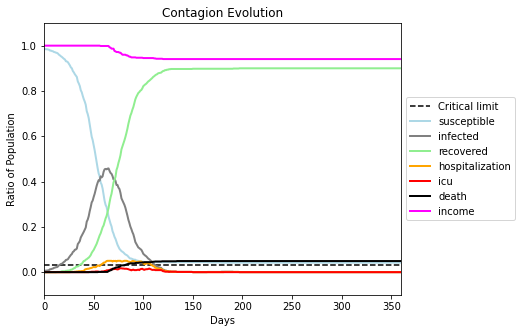

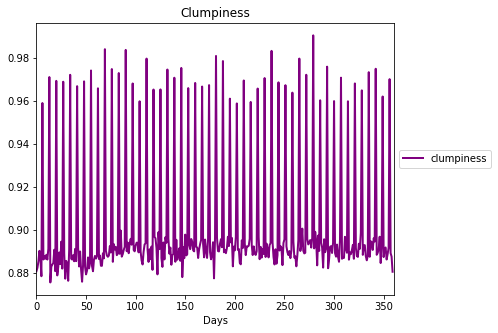

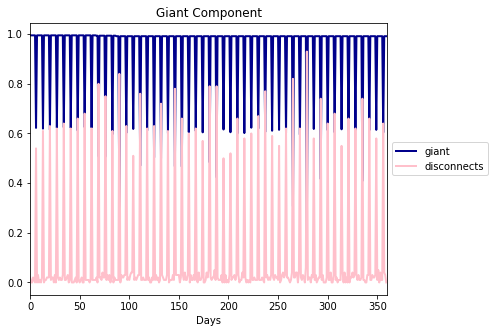

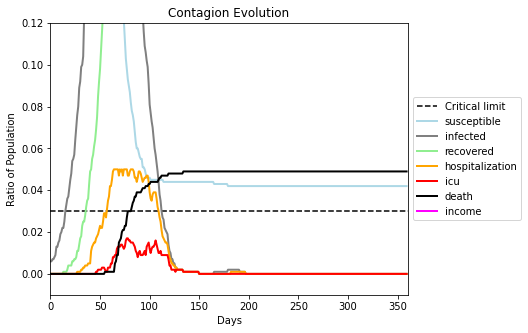

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )
